<a href="https://colab.research.google.com/github/VishalSinhaRoy/Classification-Email_Campaign_Effectiveness_Prediction-ML/blob/main/Classification_Email_Campaign_Effectiveness_Prediction_ML(Capstone_M6)(Vishal's).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Email Campaign Effectiveness Prediction



##### **Project Type**    - Classification-ML
##### **Contribution**    - Individual


# **Project Summary -**

The aim of this project is creating a machine learning model with the ability to categorize and track Gmail-based email marketing campaign messages. This model is designed for small to medium-sized business owners who wish to improve customer retention and the efficacy of their email marketing campaigns.

Determining which emails are being read, ignored, or acknowledged by recipients is a major problem in email marketing. The project will gather information on a variety of email aspects, including the subject line, sender name, content, format, frequency, and target audience, in addition to other pertinent variables, in order to address this problem. The project will use this data to train a machine learning model that will determine the likelihood that an email will be viewed, ignored, or acknowledged by the intended recipient. New emails will be analyzed by the model, which will then forecast the recipient's response. The project will divide the data into a training set and a testing set in order to assess the model's performance. The testing set will be used to assess the model's efficacy and accuracy using measures like F1 score, precision, and recall, while the training set will be used to fit the model.

Through the application of the approach, business owners can better target their marketing efforts and enhance client retention by classifying and tracking emails. Implying machine learning, this project seeks to give small- to medium-sized business owners a useful tool for enhancing the efficacy of their email marketing operations.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Small and medium-sized business owners are converting potential clients into leads through email marketing methods based on Gmail; however, they are not able to monitor whether emails are being read, ignored, or acknowledged by the recipient. In order to better track and characterize these emails, they wish to develop a machine learning model. The principal aim is to enhance the efficacy of their email marketing endeavors and augment client retention.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
from scipy import stats
from scipy.stats import *
from scipy.stats import chi2_contingency
from collections import Counter
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

### Dataset Loading

In [ ]:
# Load Dataset
# Reading csv file from google drive
df_original=pd.read_csv('/content/drive/MyDrive/data_email_campaign.csv')

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Making a copy of the Data Frame by intacting the original
df_emaildata=df_original.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df_emaildata.head()

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                    2.2                  2   
1  EMA00081000045360           2                    2.1                  1   
2  EMA00081000066290           2                    0.1                  1   
3  EMA00081000076560           1                    3.0                  2   
4  EMA00081000109720           1                    0.0                  2   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                       33.0   
1               NaN                    2                       15.0   
2                 B                    3                       36.0   
3                 E                    2                       25.0   
4                 C                    3                       18.0   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1         440          8.0           0.0   
1                         2         504          5.0           0.0   
2                         2         962          5.0           0.0   
3                         2         610         16.0           0.0   
4                         2         947          4.0           0.0   

   Email_Status  
0             0  
1             0  
2             1  
3             0  
4             0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_emaildata.shape

(68353, 12)

### Dataset Information

In [ ]:
# Dataset Info
df_emaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_emaildata.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_emaildata.isnull().sum().sort_values(ascending=False)

Customer_Location            11595
Total_Past_Communications     6825
Total_Links                   2201
Total_Images                  1677
Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Email_Campaign_Type              0
Time_Email_sent_Category         0
Word_Count                       0
Email_Status                     0
dtype: int64

In [ ]:
# Visualizing the missing values
missingVal=pd.DataFrame() # Creating an empty dataset

missing=df_emaildata.columns[df_emaildata.isnull().any()].tolist()
missingVal['Missing Data Count']=df_emaildata.isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage']=df_emaildata.isnull().sum().sort_values(ascending = False)/len(df_emaildata)*100
print('Missing Values in Dataset')
missingVal

Missing Values in Dataset


Missing Data Count  Missing Data Percentage
Customer_Location                       11595                16.963411
Total_Past_Communications                6825                 9.984931
Total_Links                              2201                 3.220049
Total_Images                             1677                 2.453440
Email_ID                                    0                 0.000000
Email_Type                                  0                 0.000000
Subject_Hotness_Score                       0                 0.000000
Email_Source_Type                           0                 0.000000
Email_Campaign_Type                         0                 0.000000
Time_Email_sent_Category                    0                 0.000000
Word_Count                                  0                 0.000000
Email_Status                                0                 0.000000

### What did you know about your dataset?

*It has been seen that there are 16.96% missing values in Customer Location, total past cmmunication has 9.98% missing, followed by total links 3.22% and 2.45% for total images. There is no missing values in any other categorical variable. Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.*


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_emaildata.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
df_emaildata.describe()

Email_Type  Subject_Hotness_Score  Email_Source_Type  \
count  68353.000000           68353.000000       68353.000000   
mean       1.285094               1.095481           1.456513   
std        0.451462               0.997578           0.498109   
min        1.000000               0.000000           1.000000   
25%        1.000000               0.200000           1.000000   
50%        1.000000               0.800000           1.000000   
75%        2.000000               1.800000           2.000000   
max        2.000000               5.000000           2.000000   

       Email_Campaign_Type  Total_Past_Communications  \
count         68353.000000               61528.000000   
mean              2.272234                  28.933250   
std               0.468680                  12.536518   
min               1.000000                   0.000000   
25%               2.000000                  20.000000   
50%               2.000000                  28.000000   
75%               3.000000                  38.000000   
max               3.000000                  67.000000   

       Time_Email_sent_Category    Word_Count   Total_Links  Total_Images  \
count              68353.000000  68353.000000  66152.000000  66676.000000   
mean                   1.999298    699.931751     10.429526      3.550678   
std                    0.631103    271.719440      6.383270      5.596983   
min                    1.000000     40.000000      1.000000      0.000000   
25%                    2.000000    521.000000      6.000000      0.000000   
50%                    2.000000    694.000000      9.000000      0.000000   
75%                    2.000000    880.000000     14.000000      5.000000   
max                    3.000000   1316.000000     49.000000     45.000000   

       Email_Status  
count  68353.000000  
mean       0.230934  
std        0.497032  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        2.000000

### Variables Description

*  *Email_Id: Email id of customer*

*  *Email_Type: There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business*

*  *Subject_Hotness_Score: It is the email's subject's score on the basis of how good and effective the content is*

*  *Email_Source_Type: It represents the source of the email like sales and marketing or important admin mails related to the product*

*  *Email_Campaign_Type: The campaign type of the email.*

*  *Customer_Location: Contains demographical data of the customer, the location where the customer resides.*

*  *Total_Past_Communications: This columns contains the total previous mails from the same source, the number of communications had.*

*  *Time_Email_sent_Category: It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time*

*  *Word_Count: Total count of word in each email*

*  *Total_links: Total number of links in the email*

*  *Total_Images: Total Number of images in the email*

*  *Email_Status: Our target variable which contains whether the mail was ignored, read, acknowledged by the reader*

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_emaildata.columns:
  print(i, ':', df_emaildata[i].nunique())

Email_ID : 68353
Email_Type : 2
Subject_Hotness_Score : 51
Email_Source_Type : 2
Customer_Location : 7
Email_Campaign_Type : 3
Total_Past_Communications : 64
Time_Email_sent_Category : 3
Word_Count : 151
Total_Links : 37
Total_Images : 45
Email_Status : 3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking Shape of Email Read
print('No. of Email Read : ',len(df_emaildata[df_emaildata['Email_Status']==1]))
# Checking Shape of Email Acknowledged by Reader
print('No. of Email Acknowledged : ',len(df_emaildata[df_emaildata['Email_Status']==2]))
# Checking Shape of Email Ignored
print('No. of Email Ignored : ',len(df_emaildata[df_emaildata['Email_Status']==0]))

No. of Email Read :  11039
No. of Email Acknowledged :  2373
No. of Email Ignored :  54941


In [ ]:
# Email id is not an important feature to analysis
df_emaildata.drop(columns='Email_ID', inplace=True)

In [ ]:
# Defining variable to store numerical feature
num_feature=df_emaildata.select_dtypes(include='float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [ ]:
# Defining variable to store categorial features
cat_feature=[feature for feature in df_emaildata.columns.to_list() if feature not in num_feature]
cat_feature

['Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [ ]:
# Analyzing aggregate functions based on Email Acknowledged
for cat in cat_feature:
  if (cat=='Email_Status') | (cat=='Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df_emaildata[df_emaildata['Email_Status']==2].groupby(cat)[num_feature].agg(['sum','mean','median']).T)
    print('='*50)

Email Acknowledged based on Email_Type 

Email_Type                                    1              2
Subject_Hotness_Score     sum        984.700000     169.300000
                          mean         0.595345       0.235466
                          median       0.300000       0.200000
Total_Past_Communications sum      59238.000000   20580.000000
                          mean        40.079838      31.906977
                          median      41.000000      36.000000
Total_Links               sum      17978.000000    6059.000000
                          mean        11.222222       8.743146
                          median      11.000000       8.000000
Total_Images              sum       6612.000000    1935.000000
                          mean         4.086527       2.772206
                          median       1.000000       0.000000
Word_Count                sum     990293.000000  482427.000000
                          mean       598.726119     670.969402
              

In [ ]:
# Analyzing aggregate functions based on Email Opened
for cat in cat_feature:
  if (cat=='Email_Status') | (cat=='Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(df_emaildata[df_emaildata['Email_Status']==1].groupby(cat)[num_feature].agg(['sum','mean','median']).T)
    print('='*50)

Email Opened based on Email_Type 

Email_Type                                   1             2
Subject_Hotness_Score     sum     8.861200e+03  1.156900e+03
                          mean    1.079581e+00  4.086542e-01
                          median  7.000000e-01  2.000000e-01
Total_Past_Communications sum     2.612080e+05  8.399600e+04
                          mean    3.531747e+01  3.293961e+01
                          median  3.600000e+01  3.500000e+01
Total_Links               sum     8.327300e+04  2.202100e+04
                          mean    1.047591e+01  8.048611e+00
                          median  9.000000e+00  8.000000e+00
Total_Images              sum     2.843300e+04  5.863000e+03
                          mean    3.551461e+00  2.128903e+00
                          median  0.000000e+00  0.000000e+00
Word_Count                sum     4.697752e+06  1.825630e+06
                          mean    5.723382e+02  6.448711e+02
                          median  5.650000e+02  6.

In [ ]:
# Analyzing aggregate functions based on Email Ignored
for cat in cat_feature:
  if (cat=='Email_Status') | (cat=='Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(df_emaildata[df_emaildata['Email_Status']==0].groupby(cat)[num_feature].agg(['sum','mean','median']).T)
    print('='*50)

Email Ignored based on Email_Type 

Email_Type                                   1             2
Subject_Hotness_Score     sum     5.093480e+04  1.277250e+04
                          mean    1.305887e+00  8.014369e-01
                          median  1.200000e+00  4.000000e-01
Total_Past_Communications sum     9.708290e+05  3.843540e+05
                          mean    2.758742e+01  2.693818e+01
                          median  2.600000e+01  2.600000e+01
Total_Links               sum     4.228980e+05  1.377050e+05
                          mean    1.120705e+01  8.920451e+00
                          median  1.000000e+01  8.000000e+00
Total_Images              sum     1.525010e+05  4.140100e+04
                          mean    4.009913e+00  2.659195e+00
                          median  1.000000e+00  0.000000e+00
Word_Count                sum     2.786133e+07  1.198500e+07
                          mean    7.143198e+02  7.520239e+02
                          median  7.000000e+02  7

In [ ]:
# Calculating engagement rate based on email acknowledged by the readers
engagement_rate=df_emaildata[df_emaildata['Email_Status']==2]['Email_Status'].count()/len(df_emaildata)*100
print('engagement_rate:', engagement_rate)

# Calculating open rate based on email read and acknowledged by the readers
open_rate=df_emaildata[df_emaildata['Email_Status']==1]['Email_Status'].count()/len(df_emaildata)*100
print('open_rate:', open_rate)

# Calculating ignored rate based on email read and acknowledged by the readers
ignored_rate=df_emaildata[df_emaildata['Email_Status']==0]['Email_Status'].count()/len(df_emaildata)*100
print('ignored_rate:', ignored_rate)

engagement_rate: 3.4716837593082963
open_rate: 16.149986101561016
ignored_rate: 80.3783301391307


In [ ]:
# Function to calculate engagement-rate, open-rate and ignored-rate
# Engagement rate
def Engagement(group):
  acknowledged_emails=group[group['Email_Status']==2]
  return len(acknowledged_emails)/len(group)

# Open rate
def Open(group):
  opened_emails=group[group['Email_Status']==1]
  return len(opened_emails)/len(group)

# Ignore rate
def Ignore(group):
  ignored_emails=group[group['Email_Status']==0]
  return (len(ignored_emails)/len(group))

In [ ]:
# Calculating engagement-rate, open-rate and ignored-rate for each categorial feaure
for cat in cat_feature:
  if (cat=='Email_Status') | (cat=='Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(df_emaildata.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(df_emaildata.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(df_emaildata.groupby(cat).apply(Ignore))
    print('='*50)

Engagement Rate for - Email_Type
Email_Type
1    0.033848
2    0.036896
dtype: float64


Open Rate for - Email_Type
Email_Type
1    0.167970
2    0.145276
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1    0.798183
2    0.817827
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1    0.038278
2    0.030477
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1    0.165550
2    0.156679
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1    0.796172
2    0.812845
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A    0.033700
B    0.028795
C    0.037166
D    0.033756
E    0.035711
F    0.035191
G    0.035343
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A    0.168501
B    0.164478
C    0.154568
D    0.162841
E    0.166094
F    0.157455
G    0.161610
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A    0.797799
B    0.806727
C    0.808267
D    0.80

In [ ]:
# Calculating ratios for each numerical feature
# Link-to-Word ratio
Link_to_Word_ratio=df_emaildata['Total_Links']/df_emaildata['Word_Count']

# Image-to-Word ratio
Image_to_Word_ratio=df_emaildata['Total_Images']/df_emaildata['Word_Count']

# Image-Link-Word ratio
Image_Link_Word_ratio=df_emaildata['Total_Images']+df_emaildata['Total_Links']/df_emaildata['Word_Count']

# Percentage of words that are links
Percentage_of_words_that_are_links=(df_emaildata['Total_Links']/df_emaildata['Word_Count'])*100

# Number of Images per link
Number_of_Images_per_link=df_emaildata['Total_Images']/df_emaildata['Total_Links']

# Calculating the weighted sum of Subject_Hotness_Score and Total_Past_Communications
Hotness_Score=df_emaildata['Subject_Hotness_Score']*df_emaildata['Total_Past_Communications']

# Printing all values
print('Link_to_Word_ratio', Link_to_Word_ratio.mean())
print('Image_to_Word_ratio', Image_to_Word_ratio.mean())
print('Image_Link_Word_ratio', Image_Link_Word_ratio.mean())
print('Percentage_of_words_that_are_links', Percentage_of_words_that_are_links.mean())
print('Number_of_Images_per_link', Number_of_Images_per_link.mean())
print('Hotness_Score', Hotness_Score.mean())

Link_to_Word_ratio 0.019561519413416703
Image_to_Word_ratio 0.006425172246013729
Image_Link_Word_ratio 3.56208687250181
Percentage_of_words_that_are_links 1.9561519413416701
Number_of_Images_per_link 0.24534715873562615
Hotness_Score 26.159572877389156


### What all manipulations have you done and insights you found?

*   Analyzed email campaign effectiveness by assessing the engagement rate and bounce/ignore rate of the emails.
*   Results showed that 80% of emails were ignored, with only 17% being read and 3% being acknowledged.
*   Grouped categorical features to better understand the relationship and determined engagement rates for each categorical variable.
*   Calculated link and image density with respect to total word count and determined the percentage of each with respect to word count.
*   Combined subject hotness score and total past communication to calculate the combined weight.
*   Found that emails with an average of at least 37 total communications had a higher chance of being acknowledged, and those with an average of 590-600 words and a maximum of 10 links and 3 images were more likely to be acknowledged.
*   Email type 1 with source 2, location c, and campaign type 1 had a higher rate of acknowledged emails when sent in the morning, indicating an effective email strategy.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

1. What is the distribution of Continous Variables - Distplot

<ipython-input-88-d1f6b482c114>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_emaildata[col], fit=norm)
<ipython-input-88-d1f6b482c114>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_emaildata[col], fit=norm)
<ipython-input-88-d1f6b482c114>:7: UserWarning: 

`distplot` is a deprecated

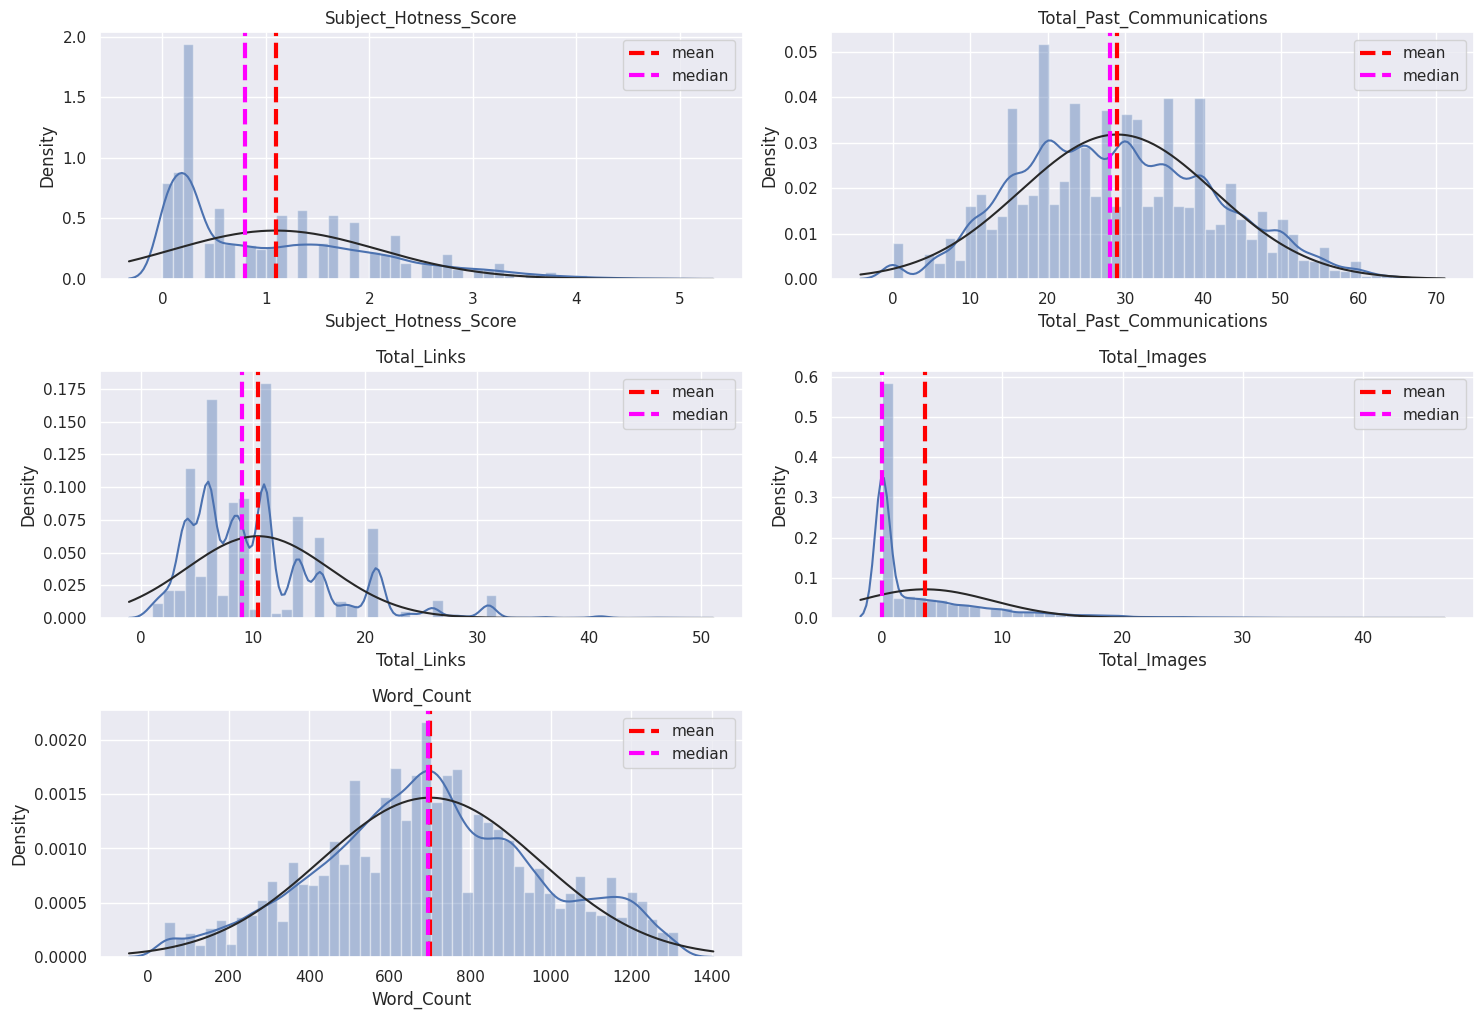

In [ ]:
# Chart - 1 visualization code
# Code numerical feature
graph=plt.figure(figsize=(15, 20))
# Iterating over the numerical features
for i, col in enumerate(num_feature):
    plt.subplot(6,2,i+1)
    sns.distplot(df_emaildata[col], fit=norm)
    feature=df_emaildata[col]
    plt.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=3, label='mean')
    plt.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=3, label='median')
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
    plt.title(f'{col.title()}')
    plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*The distplot depicted above is a useful tool for visualizing the distribution of continuous data since it combines a KDE plot and a histogram.*

##### 2. What is/are the insight(s) found from the chart?

*Word count and total communication count show reasonably normal distributions, however subject hotness score, total picture, and total connections have positively skewed distributions.*

*Furthermore, the average value of the subject hotness score is 1, the average value of the total communication is 30, the average value of the total links is 10, the average value of the total image is 3, and the average value of the word count is 700.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*This plot demonstrates the critical significance that each value plays in the development of a successful email campaign. Nevertheless, this plot would ultimately aid in the model-building process and the handling of null values and outliers.*

#### Chart - 2

2. What is the effect of email status on categorical features

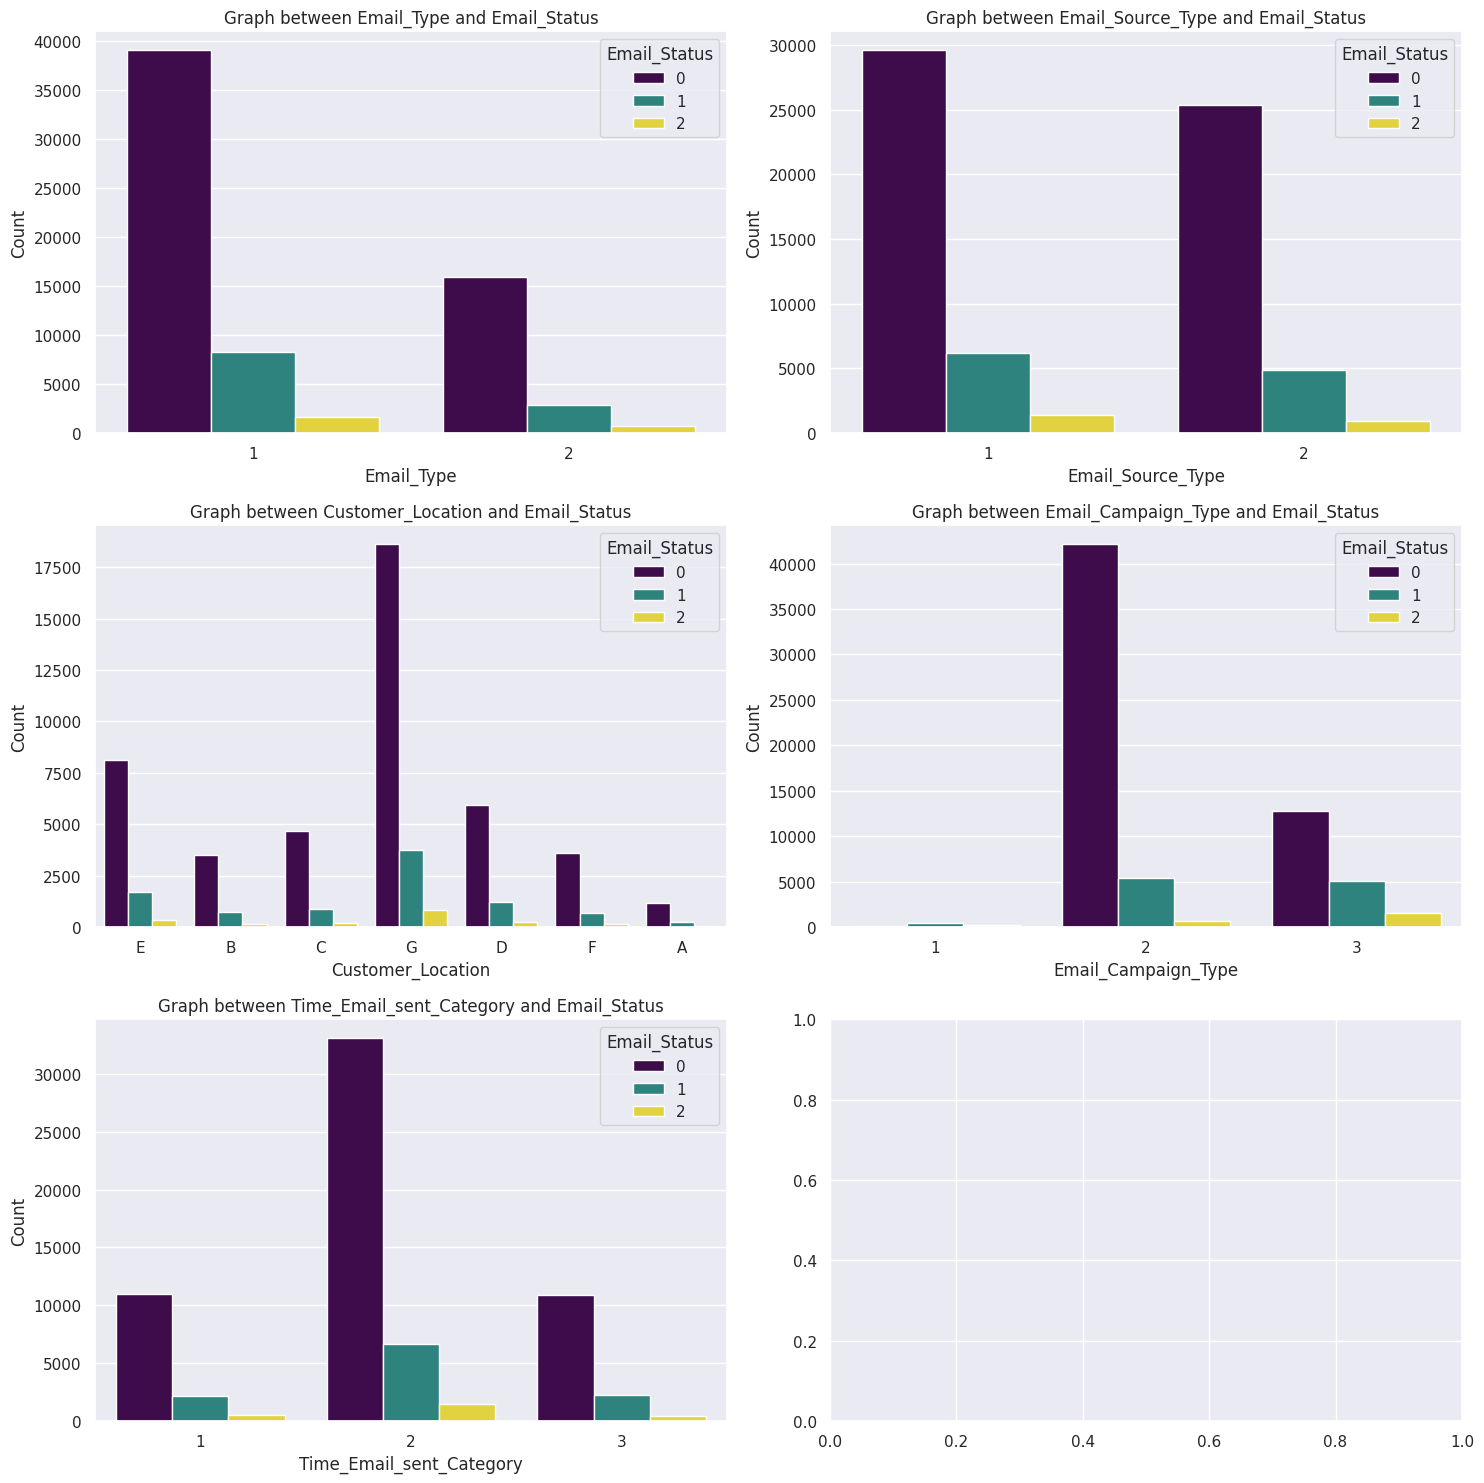

In [ ]:
# Chart - 2 visualization code
# Creating a DataFrame with only categorical features
ds_cat=df_emaildata[cat_feature]
fig, axs=plt.subplots(3, 2, figsize=(15, 15))
# Iterating over the categorical features excluding the first and last
for i, col in enumerate(cat_feature[1:-1]):
    row, col_idx=divmod(i, 2)  # Calculate row and column index for the subplot
    sns.countplot(data=ds_cat, x=col, hue='Email_Status', ax=axs[row, col_idx], palette='viridis')
    axs[row, col_idx].set_title(f'Graph between {col} and Email_Status')
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*Barplots aid in the comprehension of continuous and discrete data. The frequency counts of values for each level of a nominal or categorical variable are displayed in bar charts. Bar charts can occasionally display other statistics, such percentages.*

##### 2. What is/are the insight(s) found from the chart?

*With the exception of Email_Campaign_Type, where a clear trend is seen, the distribution of Email_Status appears to be rather constant across all categories.*

*To be more precise, only 10% of consumers are disregarding emails for Email_Campaign_Type=1, whereas 87% of customers are doing the same for Type 2.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*This graph will tell us that how the status of email has been followed and responded by the receipets of different groups locations and other categories and will say is that really our potential customer & to whom, when and how to reach for that particular customer*

#### Chart - 3

3. What is the effect of Email Type

*   Type 1 = Marketing
*   Type 2 = Important Notice





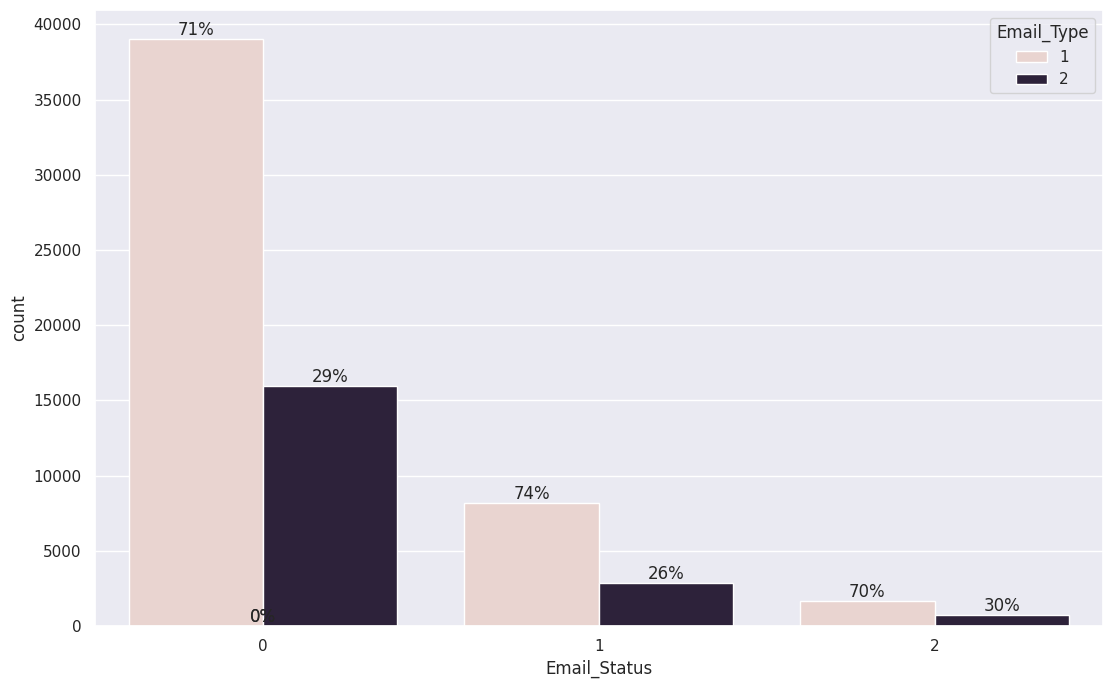

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(13,8))
ax=sns.countplot(data=df_emaildata, x='Email_Status', hue='Email_Type')
unique=len([x for x in df_emaildata['Email_Status'].unique()])
bars=ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    total=sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2., bar.get_height(), f'{bar.get_height()/total:.0%}', ha="center",va="bottom")
plt.show()

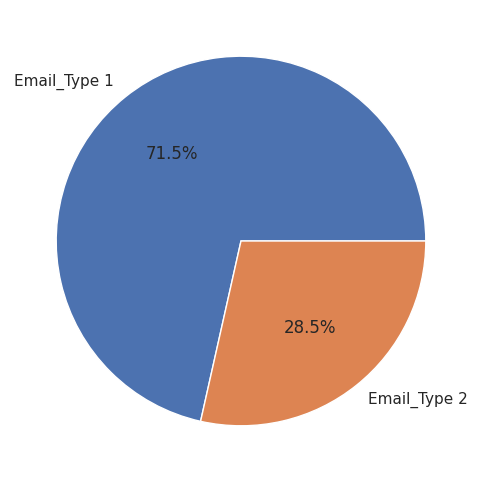

In [ ]:
#pie chart for distribution of each email type
plt.figure(figsize=(15,6))
df_emaildata['Email_Type'].value_counts().plot(kind='pie', autopct="%1.1f%%", labels=['Email_Type 1','Email_Type 2'])
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

*The count plot facilitates the understanding of the count of individual categories & Pie charts make it easier to see how much of each category there is.*

##### 2. What is/are the insight(s) found from the chart?

*There are far more emails that are disregarded than are generally acknowledged, 71% of emails are type 1, yet 71% of those are ignored, meaning that only 29% of type 1 emails have an open rate. Comparably, 29% of emails are of type 2, of which 29% are disregarded; 71% of type 2 emails had an open rate.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*This graph aids in understanding how emails are being used, but despite its usefulness, it was unable to have any effect on business beyond illuminating the engagement's curiosity.*

#### Chart - 4

4. What is the effect of Email Campaign Type


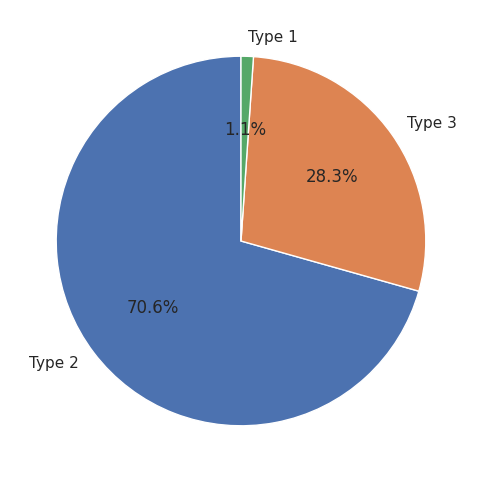

In [ ]:
# Chart - 4 visualization code
#pie chart for distribution of each email campaign type
plt.figure(figsize=(15,6))
df_emaildata['Email_Campaign_Type'].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=90, labels=['Type 2','Type 3', 'Type 1'])
plt.ylabel('')
plt.show()

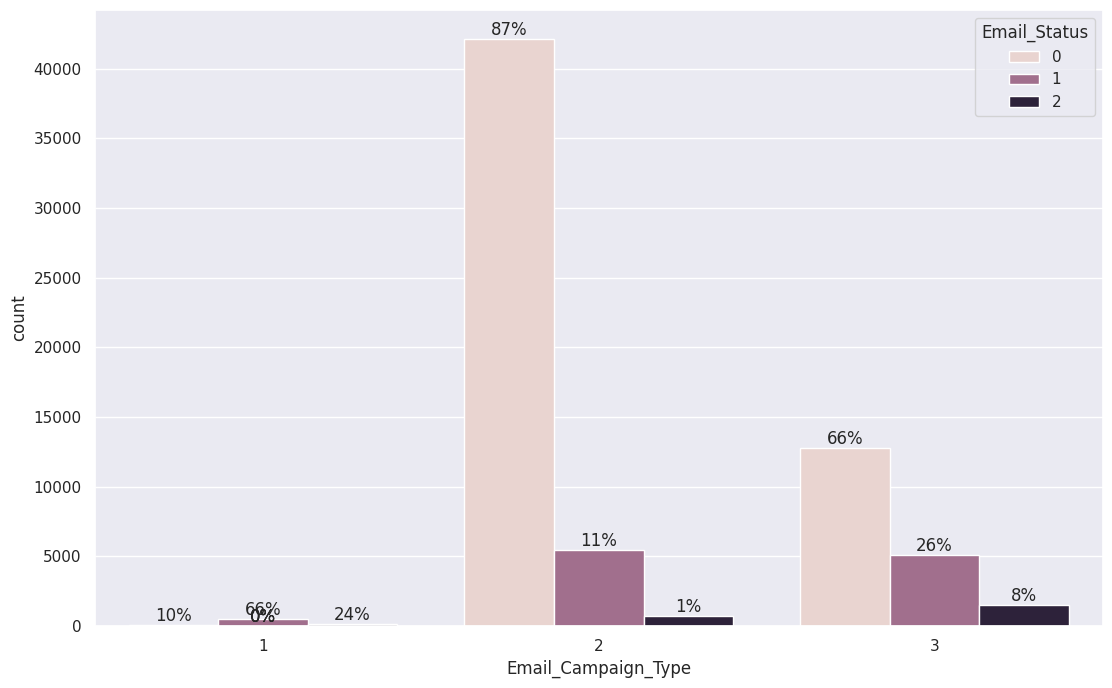

In [ ]:
#bar plot for understanding how email status is affected by campign type
plt.figure(figsize =(13,8))
ax=sns.countplot(data=df_emaildata, x='Email_Campaign_Type', hue='Email_Status')
unique=len([x for x in df_emaildata['Email_Campaign_Type'].unique()])
bars=ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total=sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2., bar.get_height(), f'{bar.get_height()/total:.0%}',ha="center",va="bottom")
plt.show()

##### 1. Why did you pick the specific chart?

*Understanding both discrete and continuous data is aided by barplots. The frequency counts of values for each level of a nominal or categorical variable are displayed in bar charts. Bar charts can occasionally display other statistics, such percentages.*


##### 2. What is/are the insight(s) found from the chart?

*Email campaign 1 has a far higher open rate than the rest while having a much less quantity of emails.*

*Email campaign type 2 displays 1% of acknowledged emails and the majority of ignored emails.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*The company should discontinue campaign 2 because the majority of the emails are being ignored and increase campaign type 1 since it shows more engagement. Sending bulk emails will only result in a loss of money, thus it is best to discontinue that category and do an A/B test with the content and other categories first. If emails are ignored in large quantities.*

#### Chart - 5

5. What is the engagement based on Email Type with all numerical features

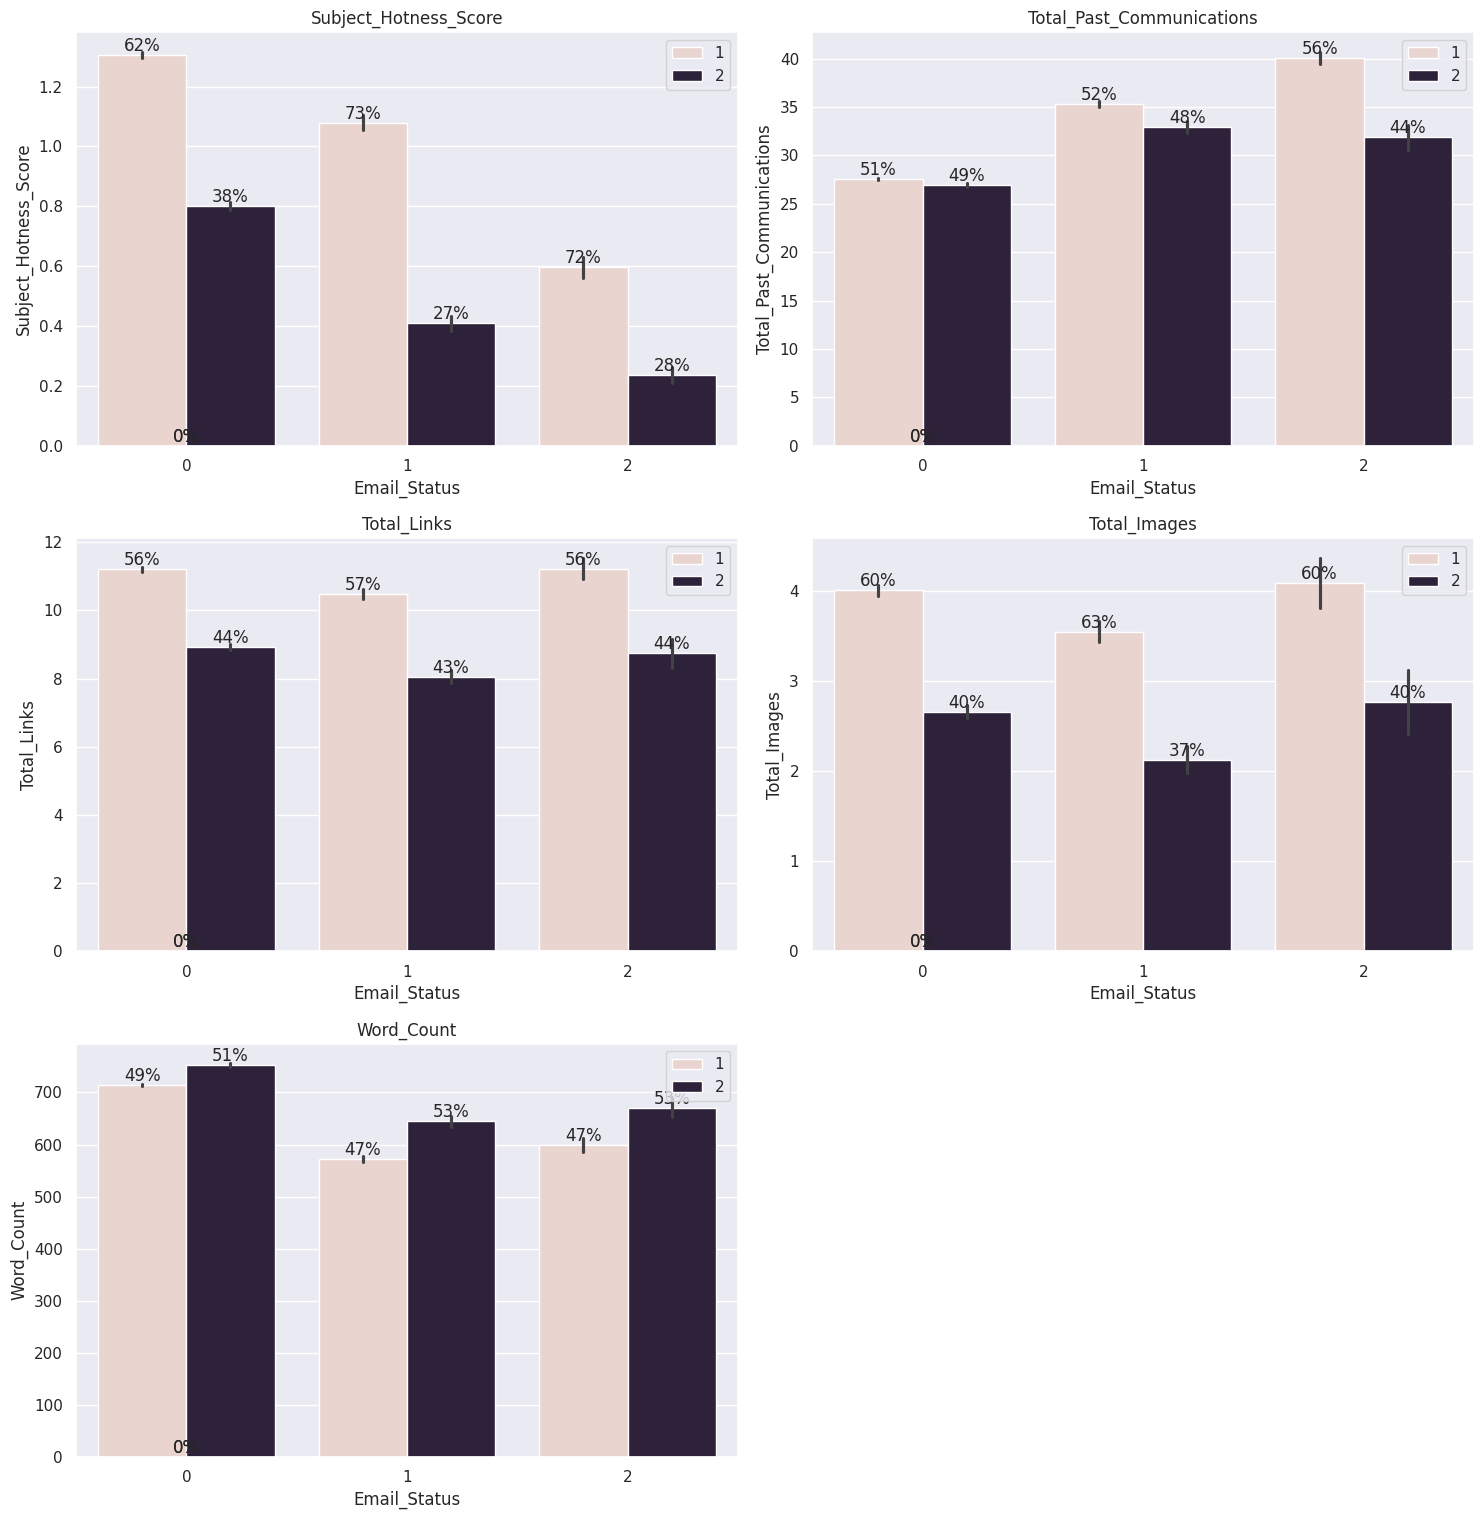

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(15,30))
for i, value in enumerate(num_feature):
  plt.subplot(6,2,i+1)
  ax=sns.barplot(data=df_emaildata, x ='Email_Status', y=value, hue='Email_Type')
  unique=len([x for x in df_emaildata['Email_Status'].unique()])
  bars=ax.patches
  for j in range(unique):
      catbars=bars[j:][::unique]
      total=sum([x.get_height() for x in catbars])
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2., bar.get_height(), f'{bar.get_height()/total:.0%}', ha="center",va="bottom")
  plt.title(value)
  plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
  plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*Barplots can be used to comprehend continuous and discrete data. They show the frequency counts of values for various levels of a nominal or categorical variable, frequently with supplementary statistics like percentages.*

##### 2. What is/are the insight(s) found from the chart?

*According to the preceding graphic, type 2 emails, which are delivered at a lower volume, have a decent engagement rate even though type 1 emails were sent more frequently and their rate of being ignored was similarly high.*

*This graph shows that in order to get better engagement, previous communication must have been more frequent. An average word length of 600 with a subject hotness score of 0.6 and material with an average of 10 links and three images yields positive results.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Since communication is vital and marketing emails are typically ignored more than critical notices, emails should have a reply option rather than just being sent from a no-reply email address. Additionally, emails delivered in the form of notices demonstrate greater engagement. If email marketing is the main strategy for growing a firm or bringing in money, then low click-through or conversion rates and marketing emails that are frequently ignored could result in negative growth.*

#### Chart - 6

6. What is the effect of Location in email marketing

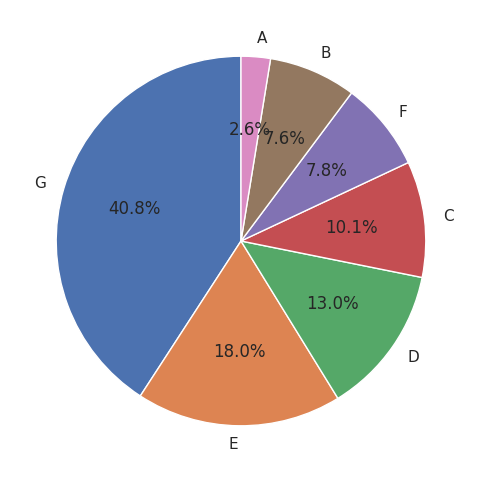

In [ ]:
# Chart - 6 visualization code
#pie chart for distribution of each email campaign type
plt.figure(figsize=(15, 6))
df_emaildata['Customer_Location'].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=90, labels=['G','E', 'D','C','F','B','A'])
plt.ylabel('')
plt.show()

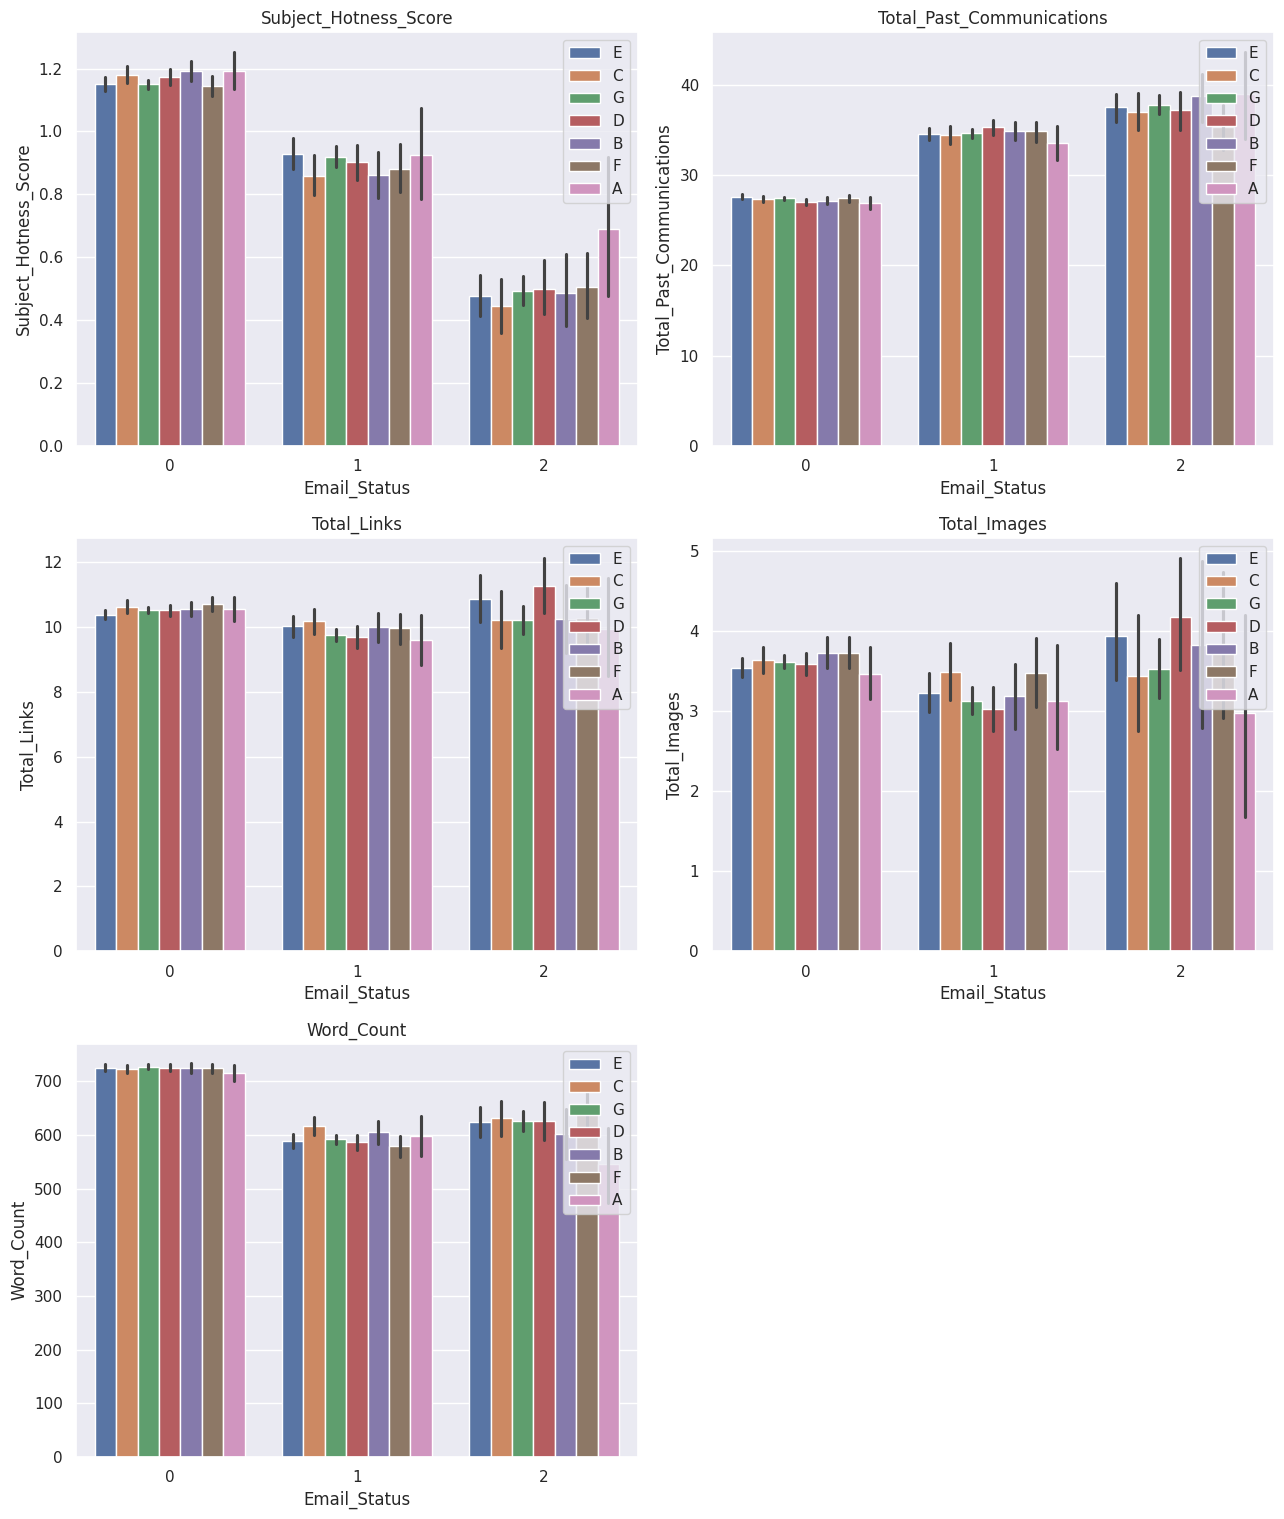

In [ ]:
# Checking effect of location on other numerical features
plt.figure(figsize=(13,30))
for i, value in enumerate(num_feature):
  plt.subplot(6,2,i+1)
  sns.barplot(data=df_emaildata, x ='Email_Status', y =value, hue ='Customer_Location')
  plt.title(value)
  plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
  plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*Paired bair chat is easy to understand and helpful in understanding the frequency of different categories at a same time plotting against a numerical variable.*

##### 2. What is/are the insight(s) found from the chart?

*Despite getting fewer emails, Location C has the highest degree of interaction. This suggests that communication with Location C is successful even with fewer emails sent, as evidenced by the higher proportion of emails acknowledged.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Since most emails sent to Location G are being ignored, resulting in a reduced percentage of recognized emails, it is advised to concentrate on sending more emails to Location C rather than Location G. Despite having a higher potential consumer base, Location G can lose money due to its lower conversion rate.*

#### Chart - 7

7. Check the continuous variables in the dataset through boxplots

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


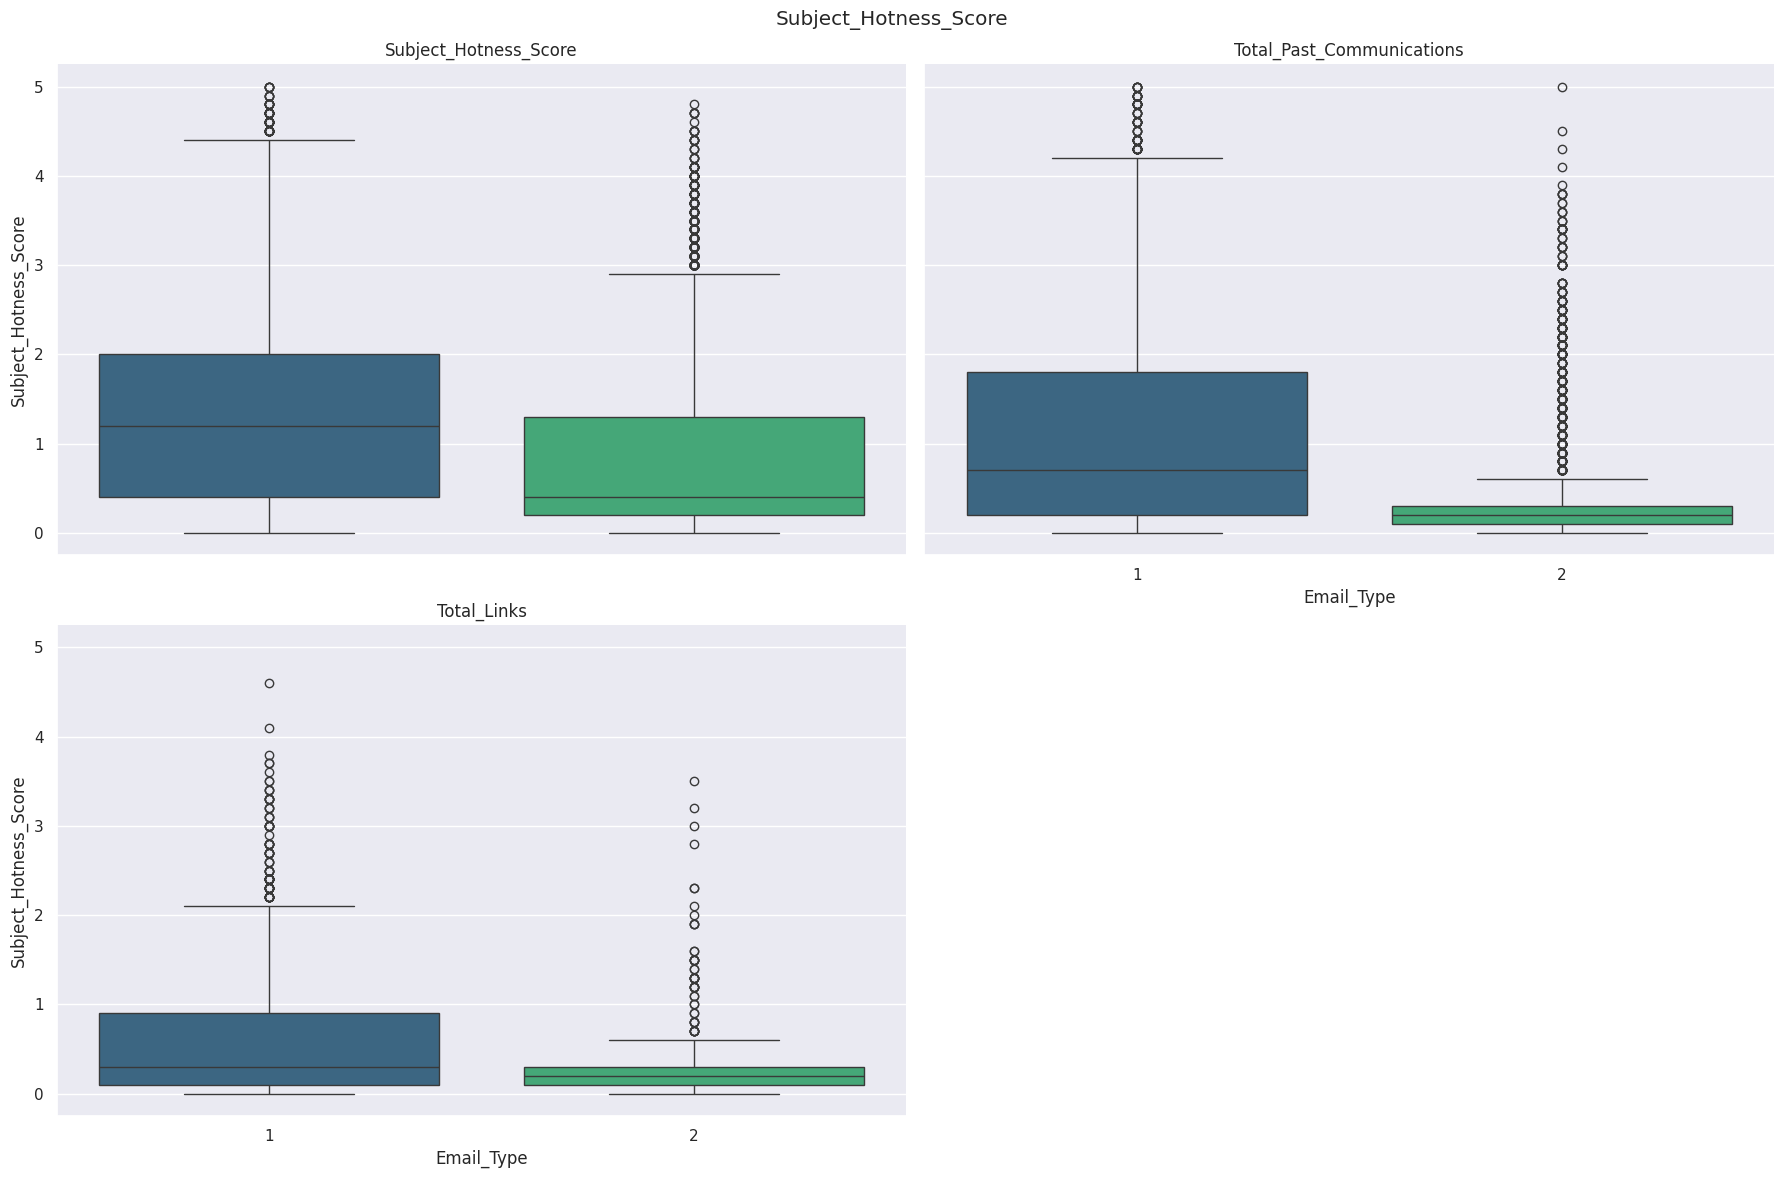

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


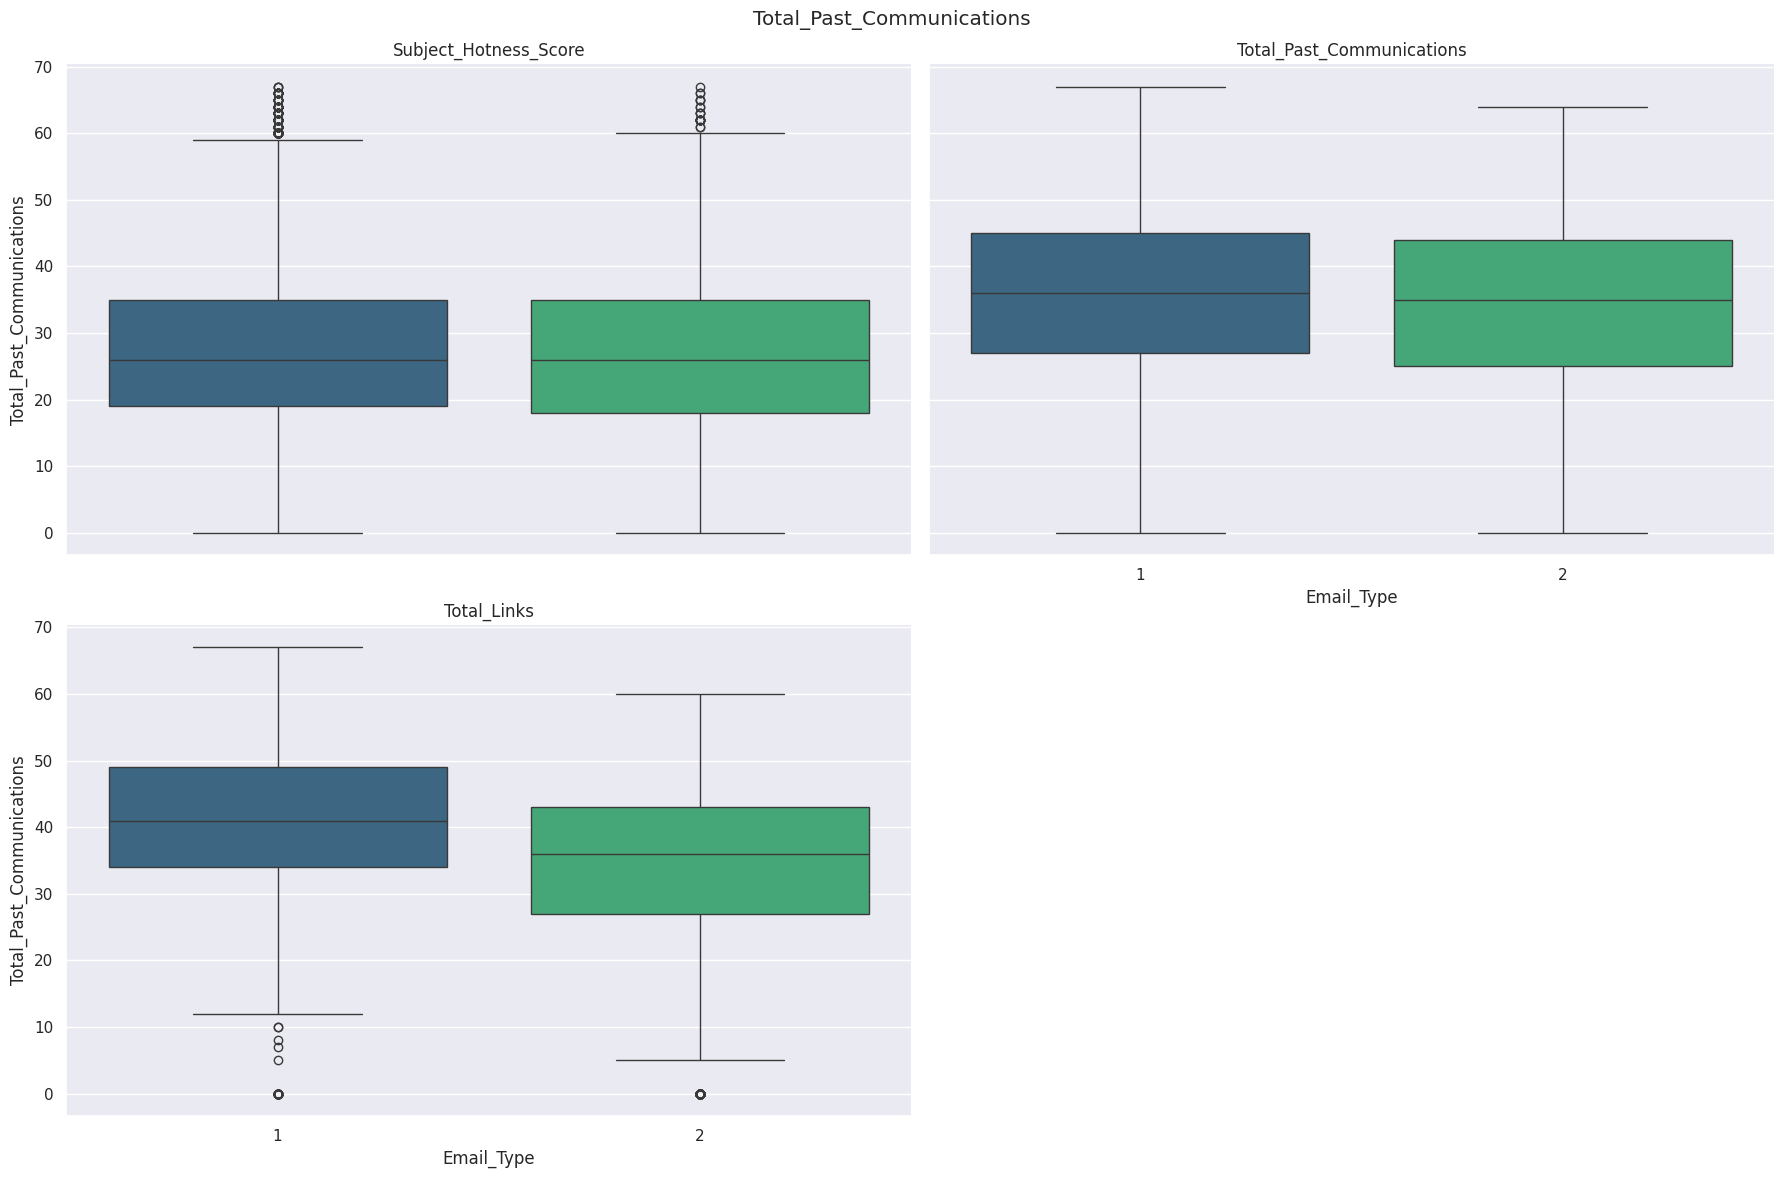

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


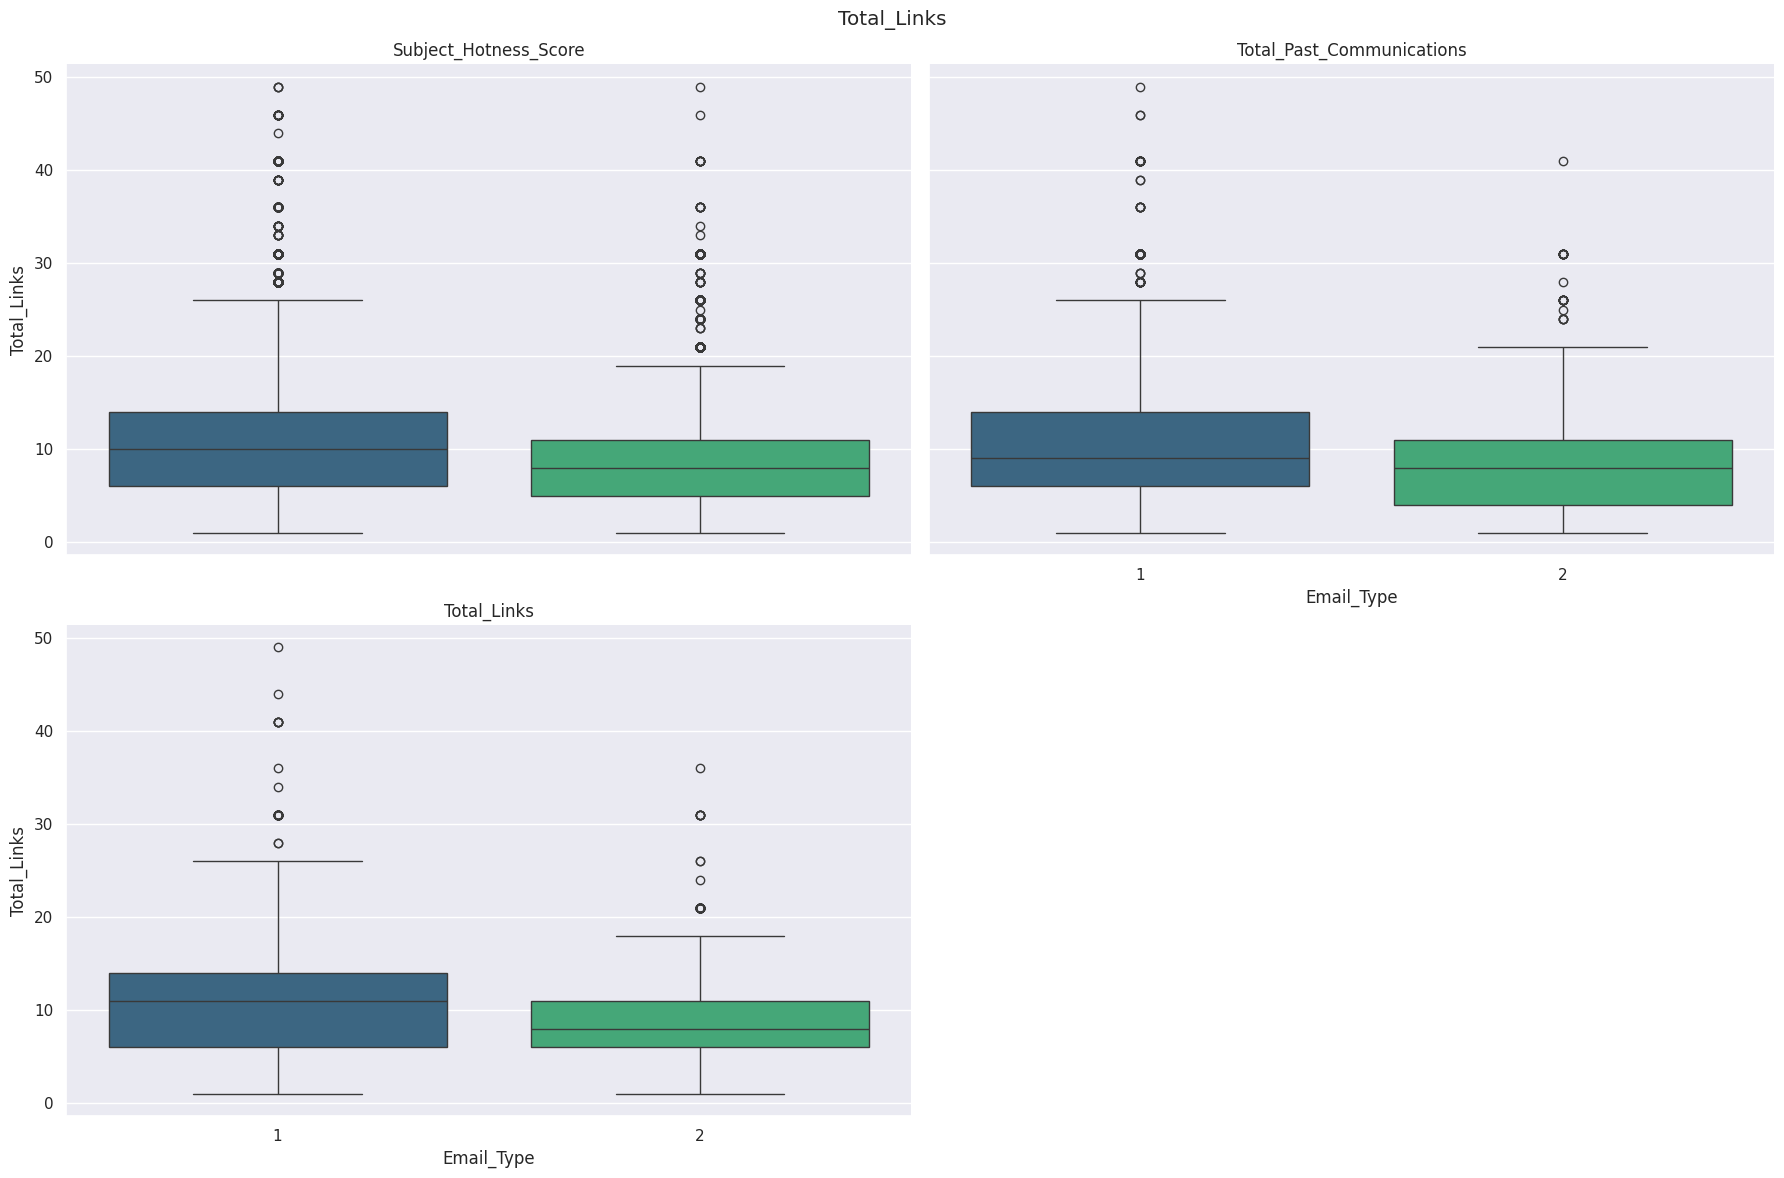

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


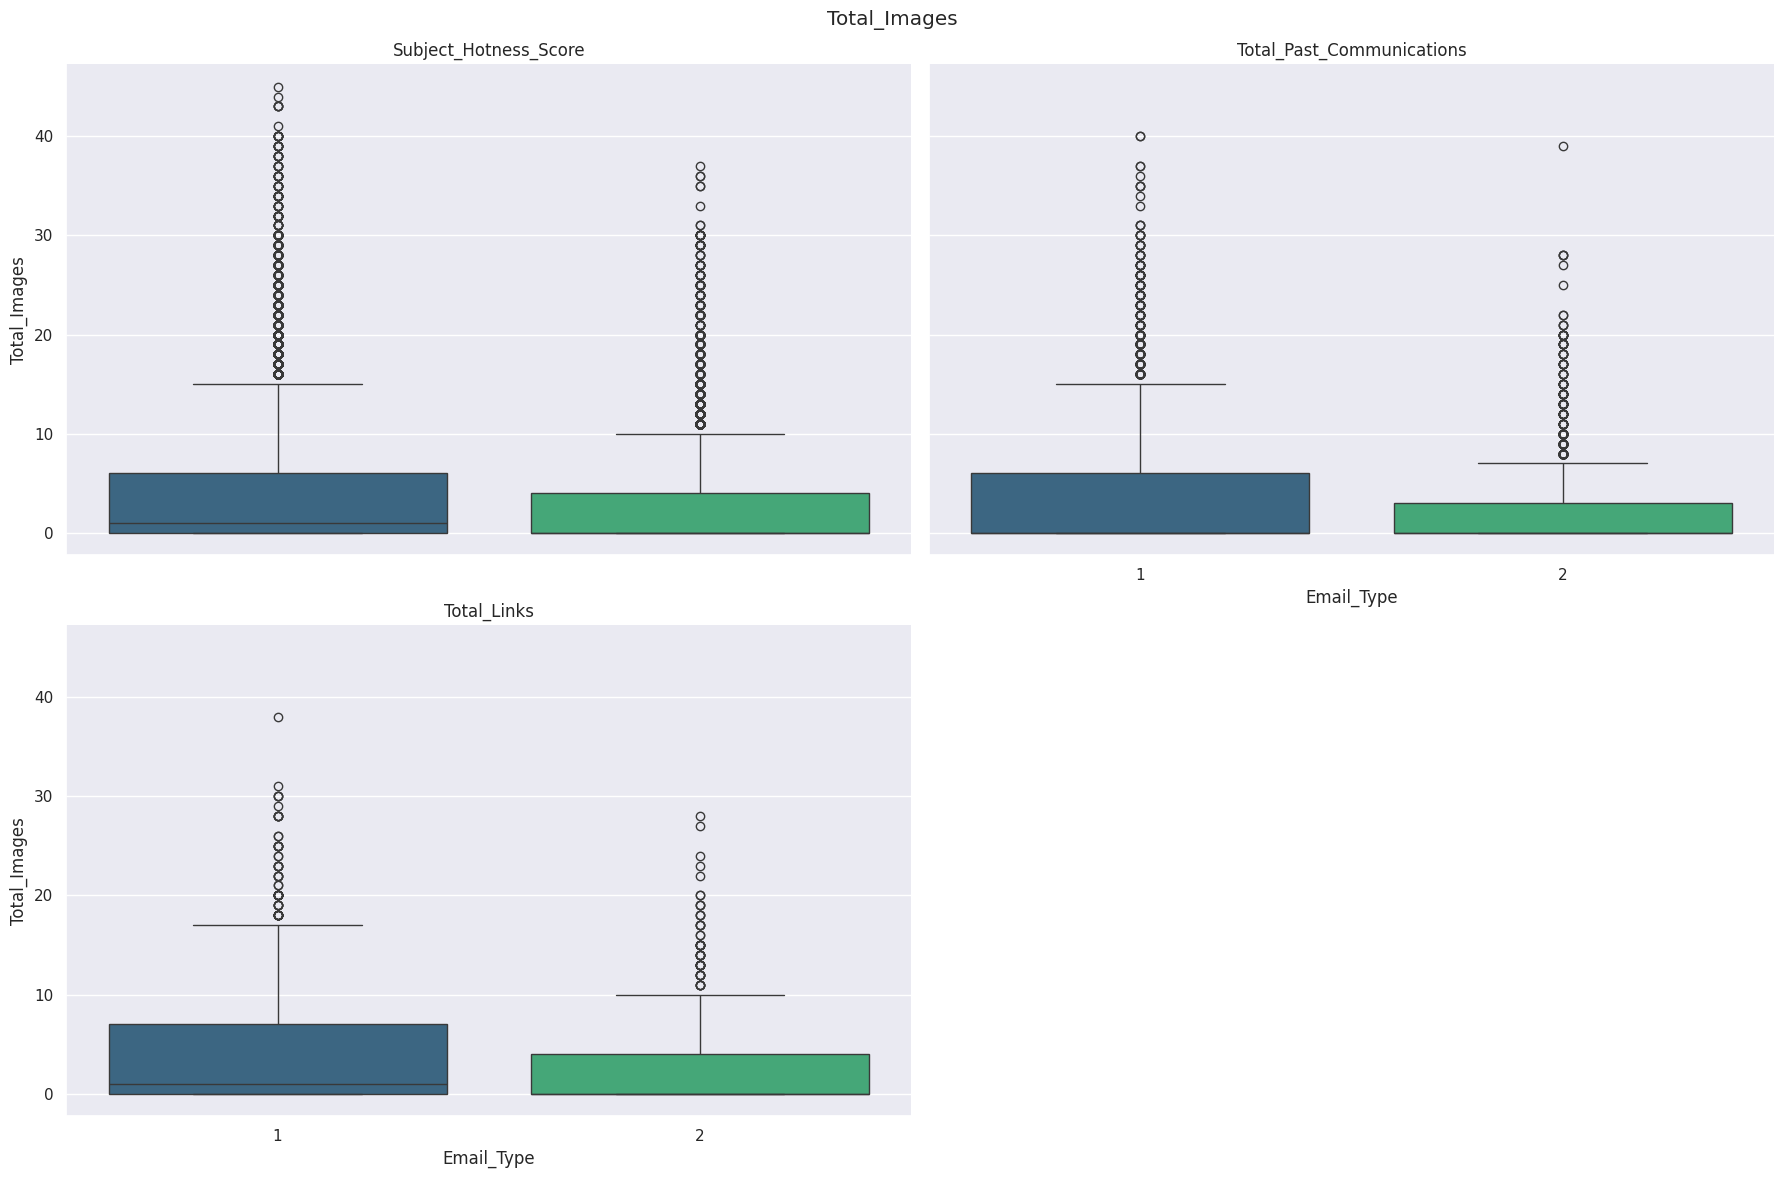

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


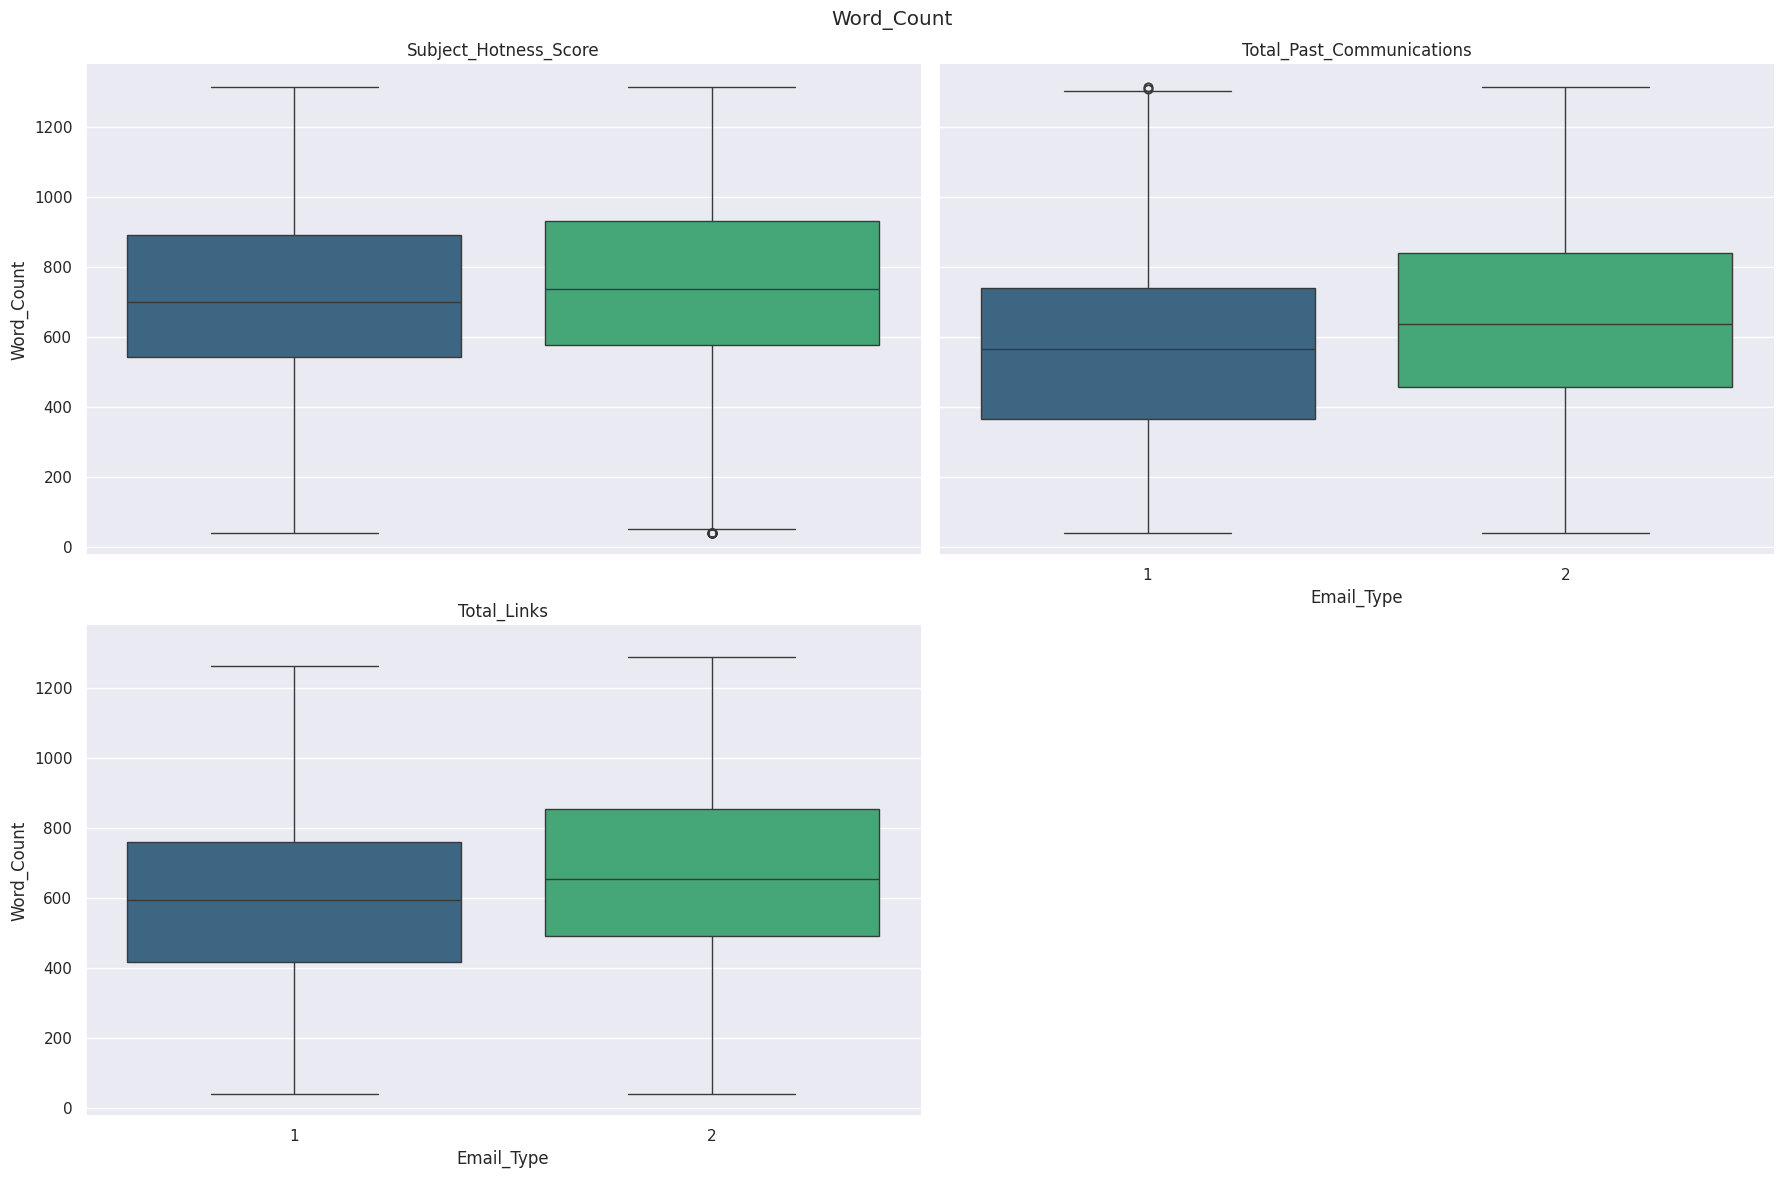

In [ ]:
# Chart - 7 visualization code
num_cols=2
for feature in num_feature:
    g = sns.FacetGrid(data=df_emaildata, col='Email_Status', height=6, aspect=1.5, col_wrap=num_cols)
    g.map_dataframe(sns.boxplot, x='Email_Type', y=feature, palette='viridis')
    g.fig.suptitle(feature)  # Set title for the entire figure
    for ax, title in zip(g.axes.flat, num_feature):
      ax.set_title(title)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

*Boxplots are a handy tool for displaying the median, quartiles, and outliers in a dataset's distribution. They are especially helpful for comparing how a variable is distributed among various groups or categories. Additionally useful in locating any possible outliers or extreme values in the data are boxplots.*

##### 2. What is/are the insight(s) found from the chart?

*With a few exceptions, the median number of ignored emails in terms of subject hotness was approximately 1. Outliers in acknowledged emails are greatest. It has been noted that emails that have been read and acknowledged have substantially lower Subject Hotness Scores.*
*By looking at all of the prior correspondence, we can observe that the more emails sent out, the higher the likelihood that those emails will be read and acknowledged. It all comes down to connecting with your clientele. An email has a greater chance of being ignored the longer it is. Emails that are too long are being ignored.*
*In the three scenarios where there are total linkages features, the median is somewhat comparable with a few outliers. There were more pictures in the unread emails. There are a good deal of anomalies.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Box plot are an important visualization tool to check the distribution of multiple variables and outliers at a same time, here in this case the Marketing team can focus on particular variable like word count, email type and sent timing on target customers by not wasting resources on unnecessary links to non potential customers*

#### Chart - 8

8. When is the most time the emails were being sent to customers

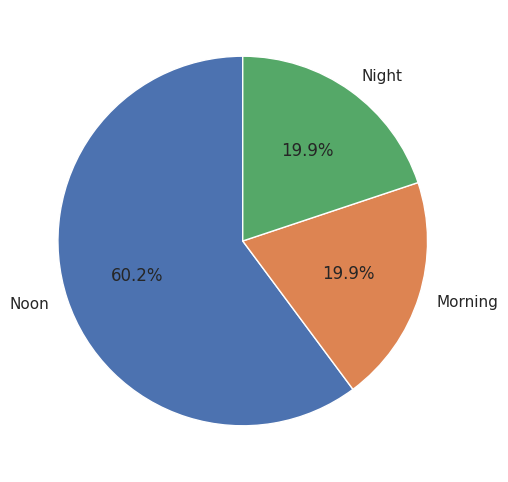

In [ ]:
# Chart - 8 visualization code
# Pie chart for distribution of email based on time period
plt.figure(figsize=(15, 6))
df_emaildata['Time_Email_sent_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Noon','Morning', 'Night'])
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

*Pie chart plots are very good to see the proportions in a varities of categorical datas.*

##### 2. What is/are the insight(s) found from the chart?

*It has been found from the graph that mostly companies are targeting the noon time to send the emails wheather it is information email or the marketing emails ie. 60% of the total, then followed by morning 19% and exactly same at noght which is also 19% of the overall.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Standalone this graph can not give much light on the business insights but we can get a note of response time to emails sent for better clarification.*

#### Chart - 9

9. What is the ideal time to sent email (Effect of Time Email was sent)

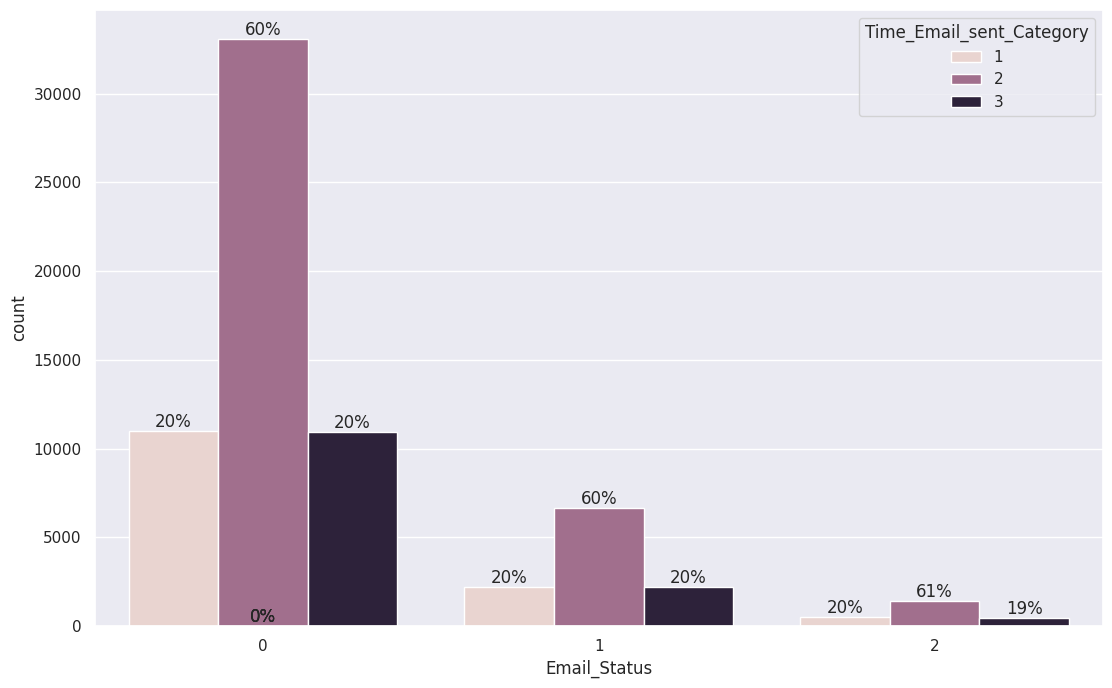

In [ ]:
# Chart - 9 visualization code
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize=(13,8))
ax=sns.countplot(data=df_emaildata, x='Email_Status', hue='Time_Email_sent_Category')
unique=len([x for x in df_emaildata['Email_Status'].unique()])
bars=ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    total=sum([x.get_height() for x in catbars])
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2., bar.get_height(), f'{bar.get_height()/total:.0%}', ha='center', va='bottom')
plt.show()

##### 1. Why did you pick the specific chart?

*Bar chart is very good in comparison of categorical datas from the bulk of datas also we can see the distrbution*

##### 2. What is/are the insight(s) found from the chart?

*Out of the 60% of emails sent in the afternoon, 60% are being ignored; that means that just 60% of the remaining 40% of emails had an opened rate. Since the percentage of emails sent in the morning and at night is the same, emails sent overall at these times are recognized more.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Emails that are sent at the appropriate time are more likely to be noticed since people often plan their days in the morning or make plans for the next night. Delivering emails at the precise moment when recipients would like to view the advertisement or content will increase impressions and boost conversion rates.*

*Emails sent in the afternoon were the most likely to be ignored, which can be expensive because there aren't many emails acknowledged at this time.*

#### Chart - 10

10. Total Past Communication made by customers

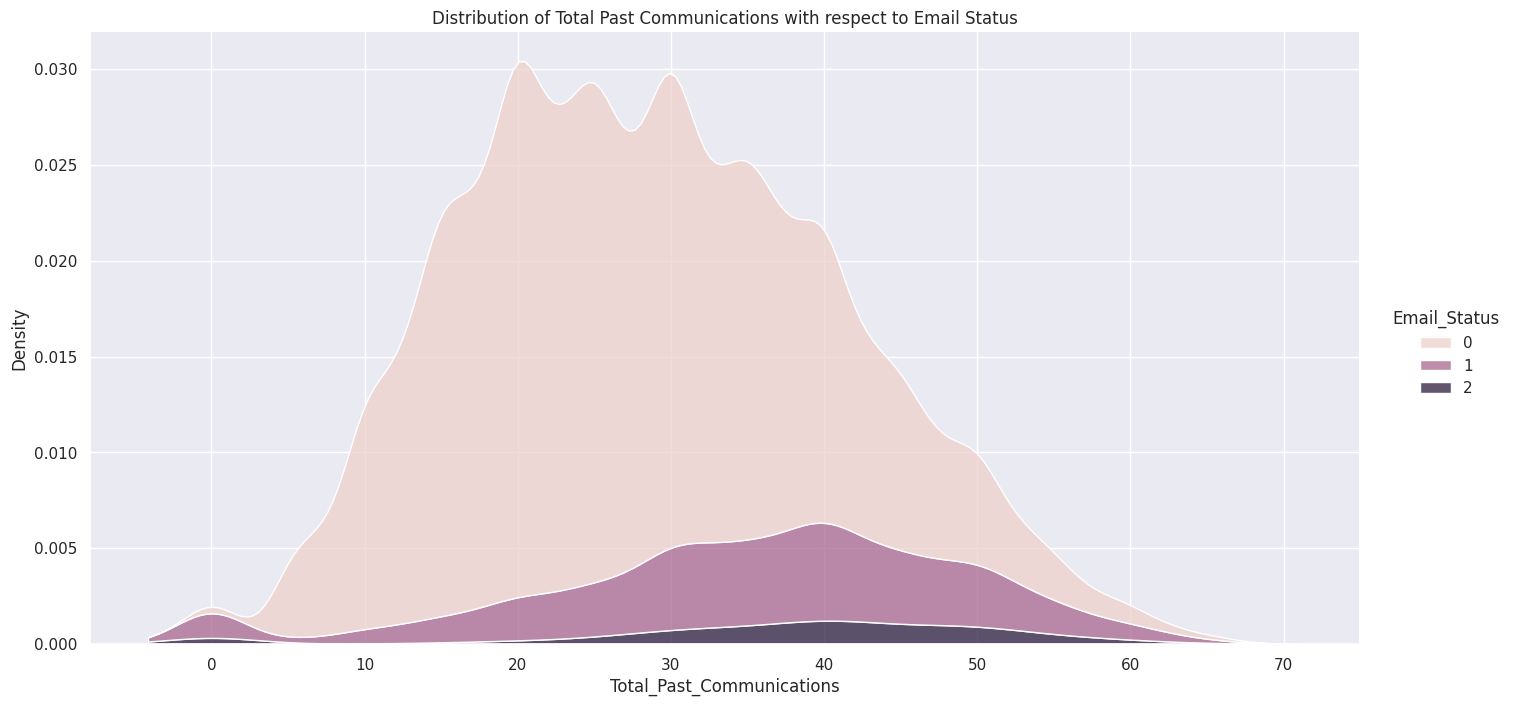

In [ ]:
# Chart - 10 visualization code
# Distplot distribution
sns.displot(data=df_emaildata, x='Total_Past_Communications', hue='Email_Status', kind='kde', height=7, aspect=2, multiple='stack')
plt.title('Distribution of Total Past Communications with respect to Email Status')
plt.xlabel('Total_Past_Communications')
plt.ylabel('Density')
plt.show()

##### 1. Why did you pick the specific chart?

*This type is typically used to plot the distribution of a single variable, often with a kernel density estimate (KDE) overlaid. However, you can achieve a stacked appearance by plotting multiple distributions on the same plot and adjusting their transparency or colors.*

##### 2. What is/are the insight(s) found from the chart?

*The density makes it clear that when there are a lot of emails that are ignored, there are less communications than there are when the emails are acknowledged.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Engaging with customers directly is far more crucial than only sending them promotional emails. This density graphic merely illustrates distribution; it is insufficient to have an effect on business.*

#### Chart - 11

11. What is the Subject Hotness Score Distribution of the dataset

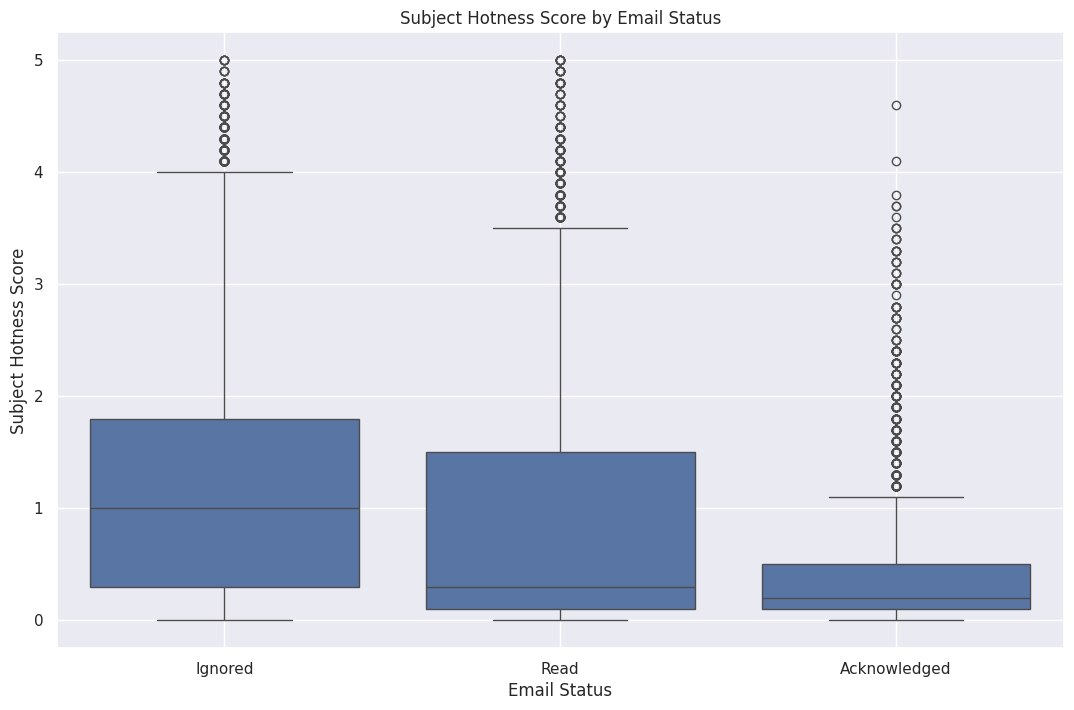

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(13, 8))
sns.boxplot(x='Email_Status', y='Subject_Hotness_Score', data=df_emaildata)
plt.title('Subject Hotness Score by Email Status')
plt.xlabel('Email Status')
plt.ylabel('Subject Hotness Score')
plt.xticks(ticks=[0, 1, 2], labels=['Ignored', 'Read', 'Acknowledged'])
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

*Here box plot, also known as a box-and-whisker plot, is used to see Subject Hotness Score Distribution which is standardized way of displaying the distribution of data based on a five-number summary ("minimum", first quartile (Q1), median, third quartile (Q3), and "maximum").*

##### 2. What is/are the insight(s) found from the chart?

*Among the Ignored, Read and Acknowledged the Ignored has least number of outliers present and more distributed than the most skewed Acknowledged one*

Answer Here

#### Chart - 12

12. Visualizing Moderately good sounding emails and their email status by customers

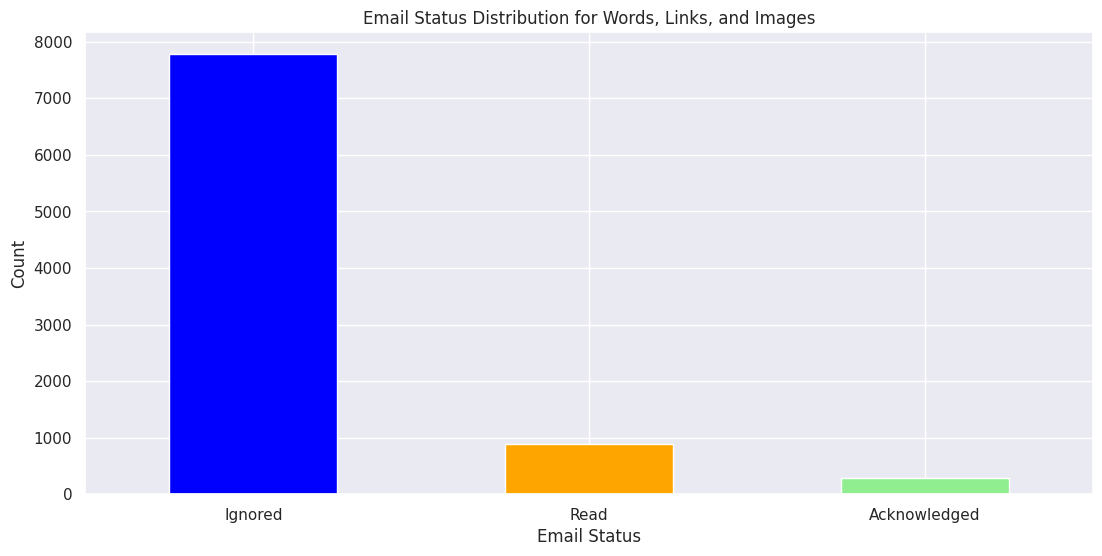

In [ ]:
# Chart - 12 visualization code
# Calculate means separately
mean_word_count=df_emaildata['Word_Count'].mean()
mean_total_links=df_emaildata['Total_Links'].mean()
mean_total_images=df_emaildata['Total_Images'].mean()
# Filter Data based on means
moderate_data=df_emaildata[(df_emaildata['Word_Count']>mean_word_count) & (df_emaildata['Total_Links']>mean_total_links) & (df_emaildata['Total_Images']>mean_total_images)]
email_status_counts = moderate_data['Email_Status'].value_counts()
# Ploting Graph
plt.figure(figsize=(13, 6))
email_status_counts.plot(kind='bar', color=['blue', 'orange', 'lightgreen'])
plt.title('Email Status Distribution for Words, Links, and Images')
plt.xlabel('Email Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Ignored', 'Read', 'Acknowledged'], rotation=0)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

*A bar plot (or bar chart) is a versatile and widely used visualization tool that can be employed in various scenarios to represent data.*

##### 2. What is/are the insight(s) found from the chart?

*Among the email Status Distribution for Words, Links, and Images all together it is still the Acknowledged one at the leat and highest being the Ignored one*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Company should focus more on customer engagement so that their email marketing could give positive results*

#### Chart - 13

13. How much is the relationship Between Word Count and Total Links

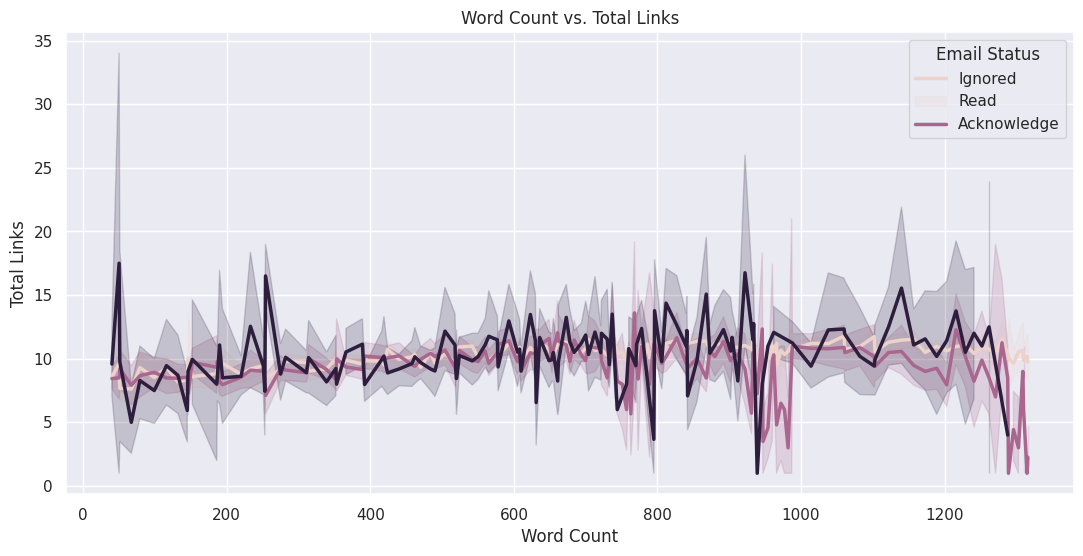

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(13, 6))
sns.lineplot(x='Word_Count', y='Total_Links', hue='Email_Status', data=df_emaildata, linewidth=2.5)
plt.title('Word Count vs. Total Links')
plt.xlabel('Word Count')
plt.ylabel('Total Links')
plt.legend(title='Email Status', labels=['Ignored', 'Read', 'Acknowledge'])
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

*A line chart is used primarily to visualize trends or patterns over time or any continuous variable. It's a versatile and effective tool for displaying data that changes continuously*

##### 2. What is/are the insight(s) found from the chart?

*Here in word count vs total links which comprises of all the necessary links for email campaign the trend of Acknowledged is increasing with increase of word count tends thay customer is getting bored so denied clicking links*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*More engaging emails should be drawn that should be of customer centric and their likeness along with proper timing when he/she should be free to read and acknowledged*

#### Chart - 14 - Correlation Heatmap

14. Heatmap for all numerical data types

In [ ]:
# Correlation Heatmap visualization code
columns_to_drop=['Email_ID','Customer_Location']
df=df_emaildata.drop(columns_to_drop, axis=1)

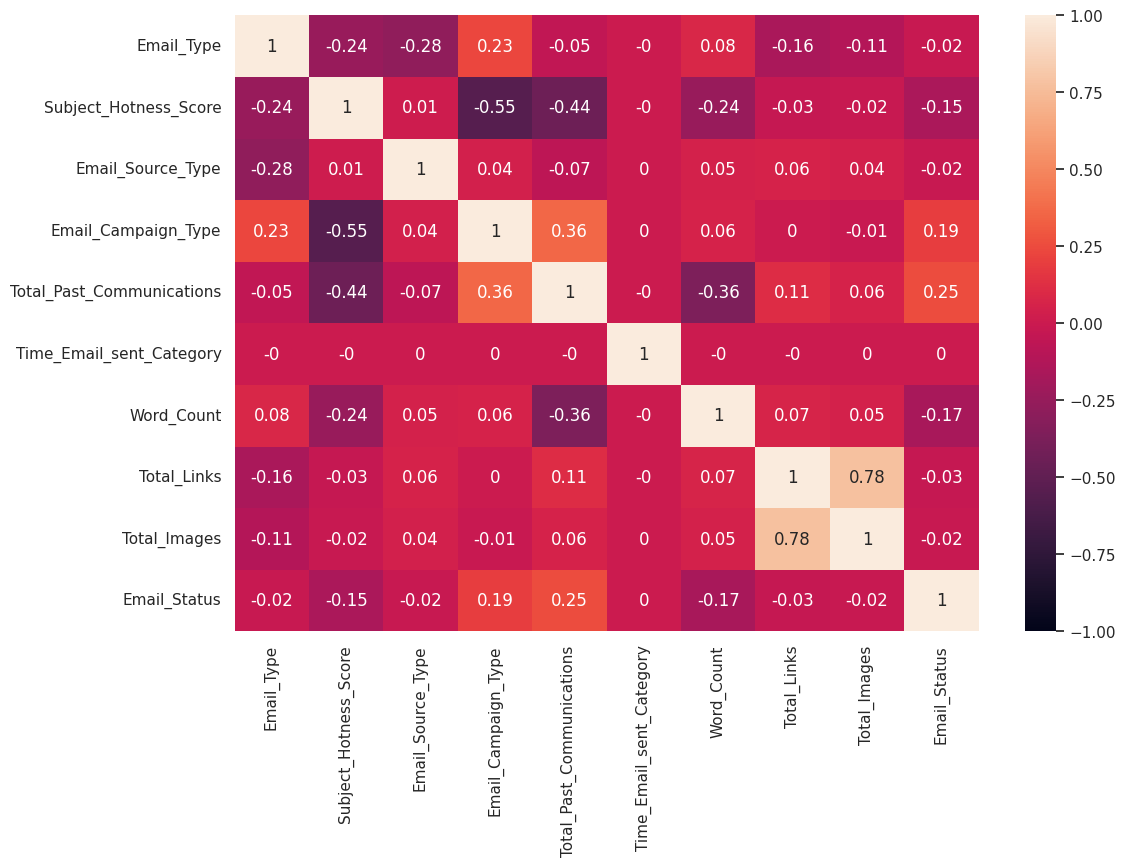

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), annot=True, vmax=1, vmin=-1)
plt.show()

##### 1. Why did you pick the specific chart?

*A table displaying correlation coefficients between variables is called a correlation matrix. The correlation between two variables is displayed in each cell of the table. A correlation matrix serves as a diagnostic tool for advanced studies, as well as a summary of the data and an input into more complex ones. The correlation's range is [-1,1].*

*I therefore utilized a correlation heatmap to determine the association between each variable and the correlation coefficients.*

##### 2. What is/are the insight(s) found from the chart?

Multicollinearity is caused by a correlation of 0.78 between the image and total linkages.

#### Chart - 15 - Pair Plot

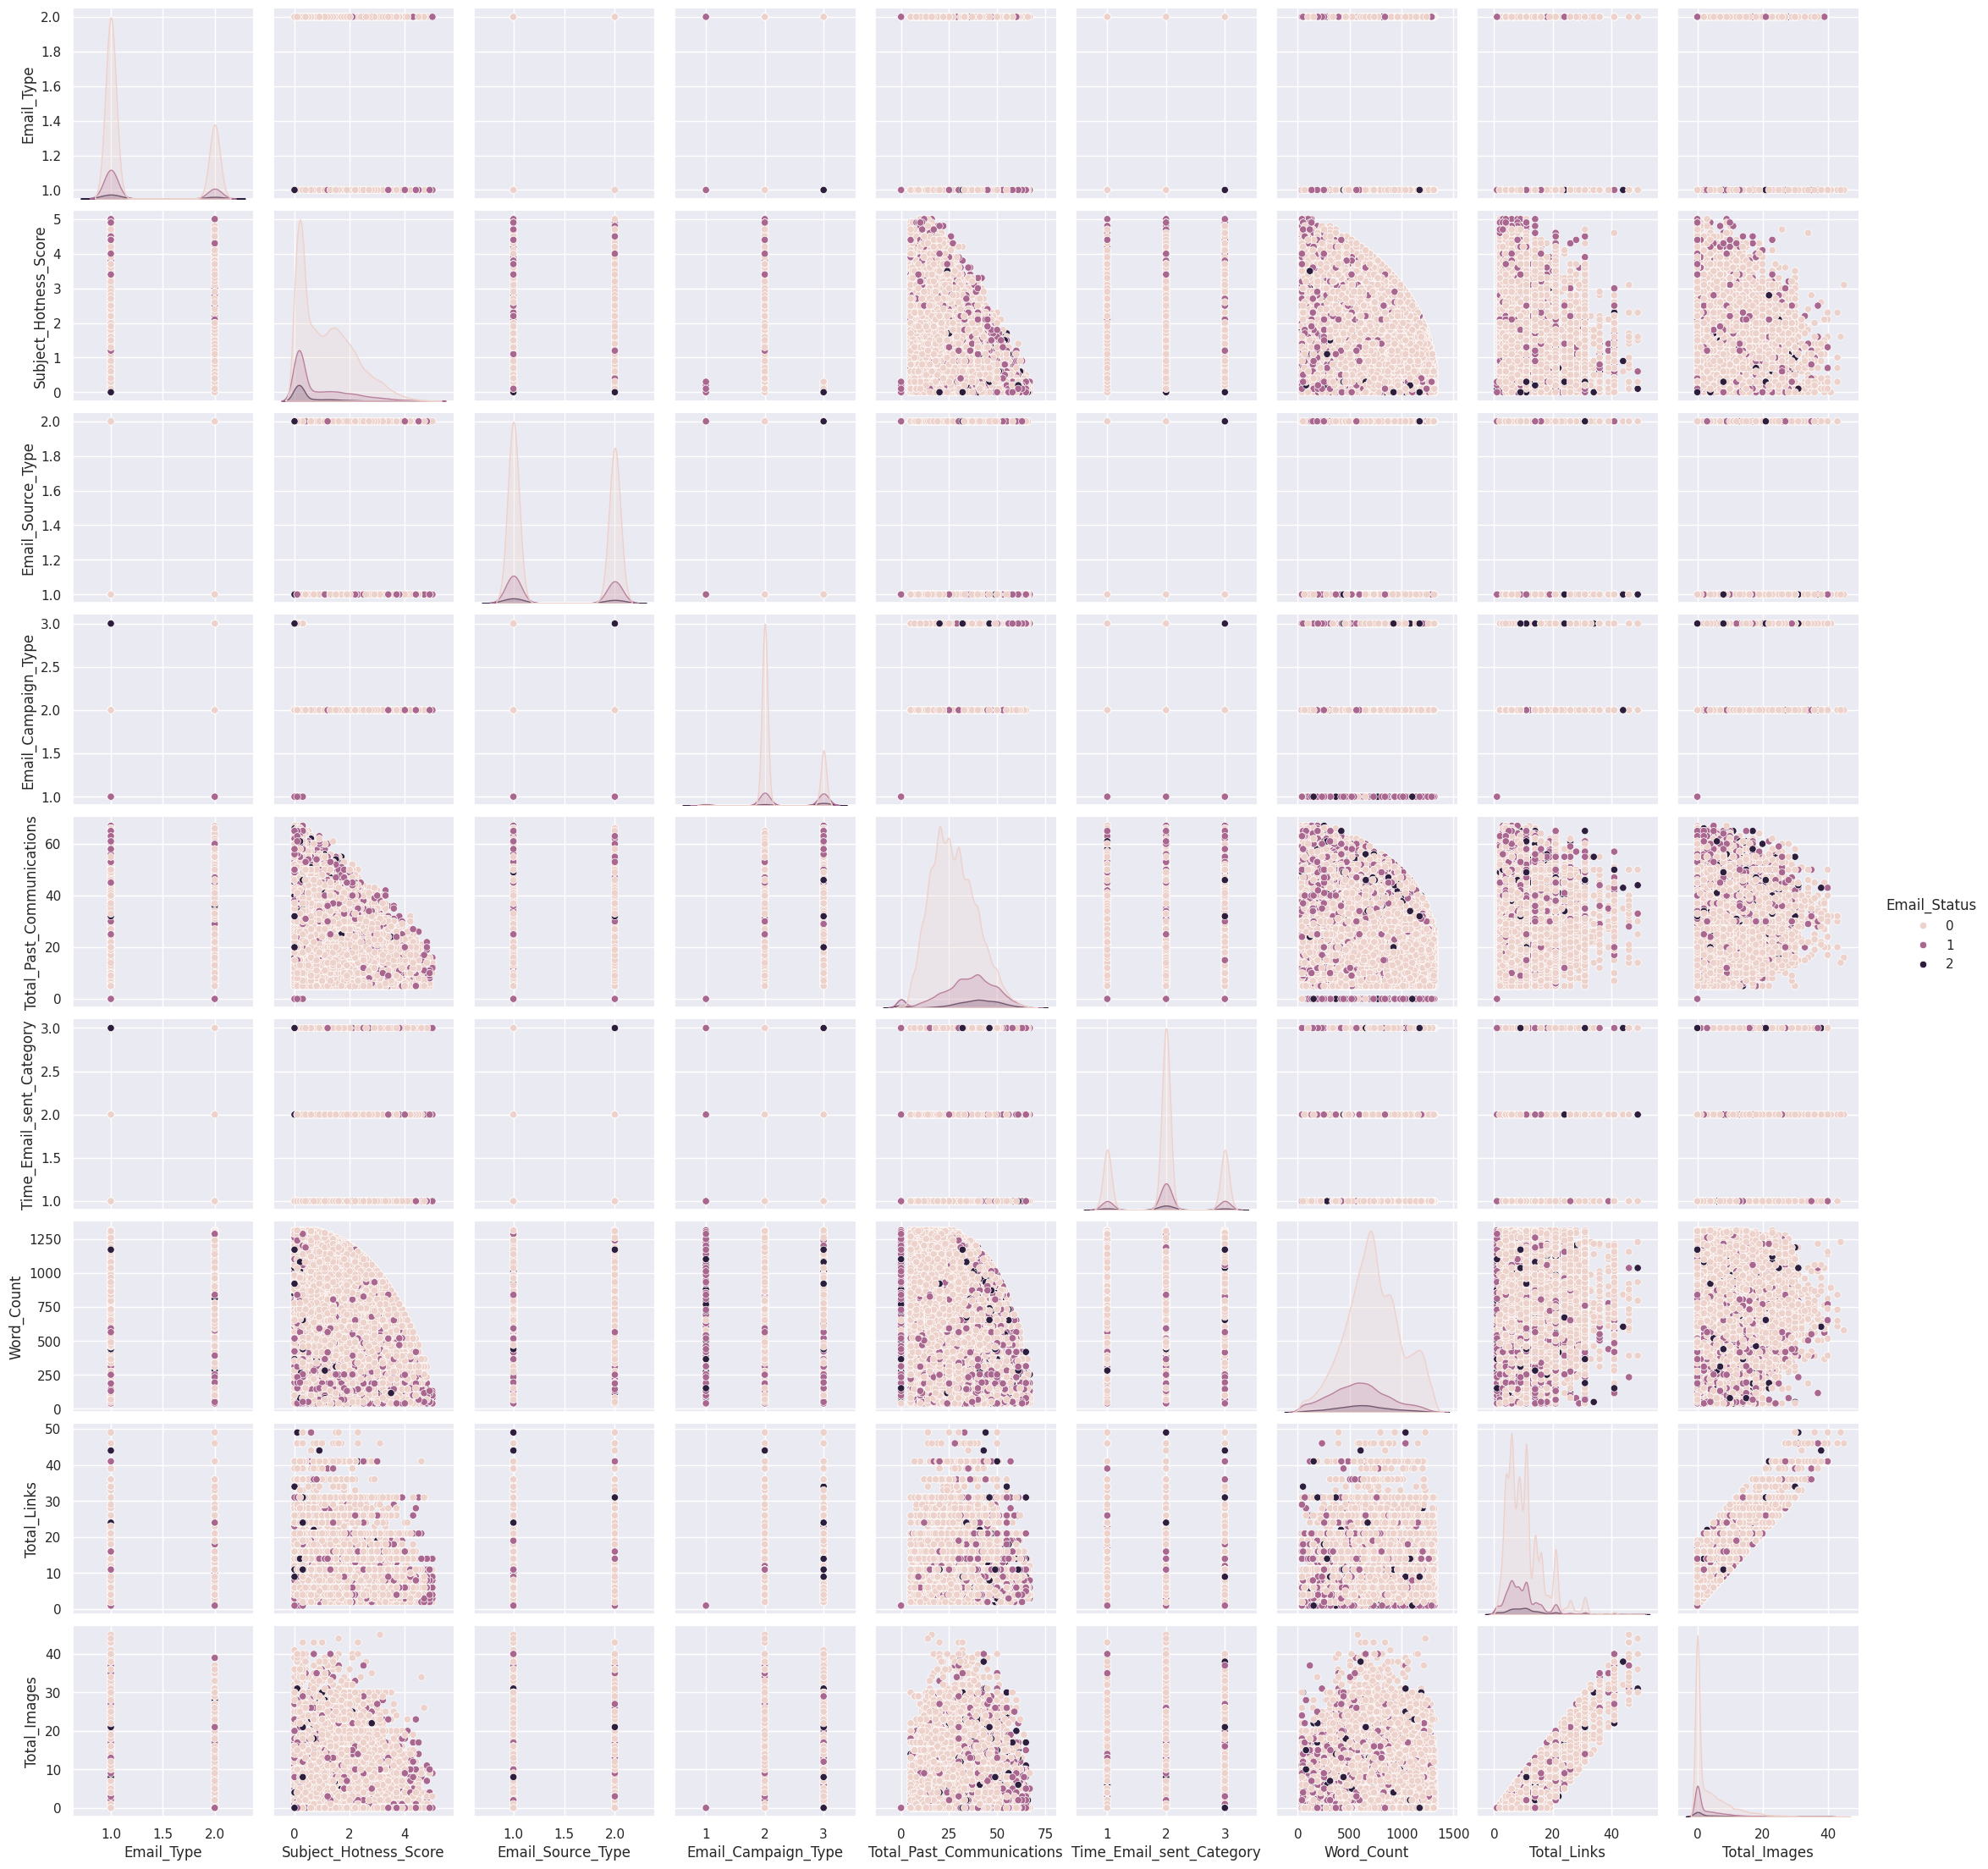

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue='Email_Status')
plt.show()

##### 1. Why did you pick the specific chart?

*A pair plot is used to determine which attributes best explain a relationship between two variables or help build the clusters that are the most distanced from one another. By using simple lines to separate our data set into categories or creating a linear separation, we can also create some basic classification models.*

*In order to analyze the data patterns and the relationships between the features, I employed pair plotting. It is precisely the same as the correlation map, except the graphical depiction is provided here.*

##### 2. What is/are the insight(s) found from the chart?

*I learned from the preceding chart that there are less linear relationships between variables and that there is not much of a relationship because the majority of the data were categorical, with only one or two categories. The entire image and all of the links exhibit some linear relationships, which confirms the correlation that was previously observed in the heatmap.*

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*   *The Email_Status will not be significantly impacted by the campaign's Email_Type.*
*   *The email's Subject Hotness Score won't have a big effect on the Total Past Communications.*
*   *The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email.*

### Hypothetical Statement - 1

The Email_Type of the campaign will not have any significant impact on the Email_Status



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)
*  Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
*  Test Type : chi-square test


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform chi-square test of independence
chi2, p_value, dof, expected=stats.chi2_contingency(pd.crosstab(df_emaildata['Email_Type'], df_emaildata['Email_Status']))

if p_value<0.05:
    print('Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status')
else:
    print('Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status')

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


##### Which statistical test have you done to obtain P-Value?

*I used the chi-square test of independence, a statistical test, to investigate this hypothesis and see if there was a significant relationship between the two categorical variables. Email_Type and Email_Status are the two variables in this instance.*

##### Why did you choose the specific statistical test?

*The variables are categorical, and I want to find out if there is a relationship between them, thus this test is appropriate.*

### Hypothetical Statement - 2

The email's Subject Hotness Score won't significantly affect the Total Past Communications.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)
*  Alternative Hypothesis: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)
*  Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [ ]:
#to perform the test, variable I used has null or infinity values, therefore creating copy and treating those
data=df_emaildata.copy()
data=data.replace([np.inf, -np.inf], np.nan)

# Select only numeric columns
numeric_data=data.select_dtypes(include=[np.number])
data[numeric_data.columns]=numeric_data.fillna(numeric_data.mean())

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform correlation test
r, p_value=stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value<0.05:
    print('Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications')
else:
    print('Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications')



Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


In [ ]:
# perform non-parametric Spearman's rank correlation test
rho, p_value=stats.spearmanr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value<0.05:
    print('Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications')
else:
    print('Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications')


Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


##### Which statistical test have you done to obtain P-Value?

*I utilized Pearson's correlation test, which calculates the linear relationship between two continuous data, to test this hypothesis. The two variables in this instance are Subject_Hotness_Score and  Total_Past_Communications.*

##### Why did you choose the specific statistical test?

*Since the variables are continuous and I want to find out if there is a linear relationship between them, this test is appropriate.*

### Hypothetical Statement - 3

The email's Total_Links and Total_Images will not be significantly impacted by the Customer_Location.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
*  Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
*  Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value =stats.f_oneway(df_emaildata[df_emaildata['Customer_Location']=='A']['Total_Links'],
                                df_emaildata[df_emaildata['Customer_Location']=='B']['Total_Links'],
                                df_emaildata[df_emaildata['Customer_Location']=='C']['Total_Links'],
                                df_emaildata[df_emaildata['Customer_Location']=='D']['Total_Links'],
                                df_emaildata[df_emaildata['Customer_Location']=='E']['Total_Links'],
                                df_emaildata[df_emaildata['Customer_Location']=='F']['Total_Links'],
                                df_emaildata[df_emaildata['Customer_Location']=='G']['Total_Links'])
if p_value<0.05:
    print('Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email')
else:
    print('Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email')

Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df_emaildata[df_emaildata['Customer_Location']=='A']['Total_Images'],
                                  df_emaildata[df_emaildata['Customer_Location']=='B']['Total_Images'],
                                  df_emaildata[df_emaildata['Customer_Location']=='C']['Total_Images'],
                                  df_emaildata[df_emaildata['Customer_Location']=='D']['Total_Images'],
                                  df_emaildata[df_emaildata['Customer_Location']=='E']['Total_Images'],
                                  df_emaildata[df_emaildata['Customer_Location']=='F']['Total_Images'],
                                  df_emaildata[df_emaildata['Customer_Location']=='G']['Total_Images'])
if p_value < 0.05:
    print('Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Images in the email')
else:
    print('Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email')

Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email


##### Which statistical test have you done to obtain P-Value?

*I employed the ANOVA (Analysis of Variance) test to test my hypothesis since this statistical test is intended to ascertain whether the means of two or more groups differ statistically significantly.*

##### Why did you choose the specific statistical test?

*The purpose of this test is to ascertain whether the means of two or more groups differ significantly from one another. In this instance, the locations are A, B, C, D, E, F, and G. Since we wish to compare the means of several groups and the variable Total_Links is continuous, an ANOVA is the proper statistical method in this instance.*

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

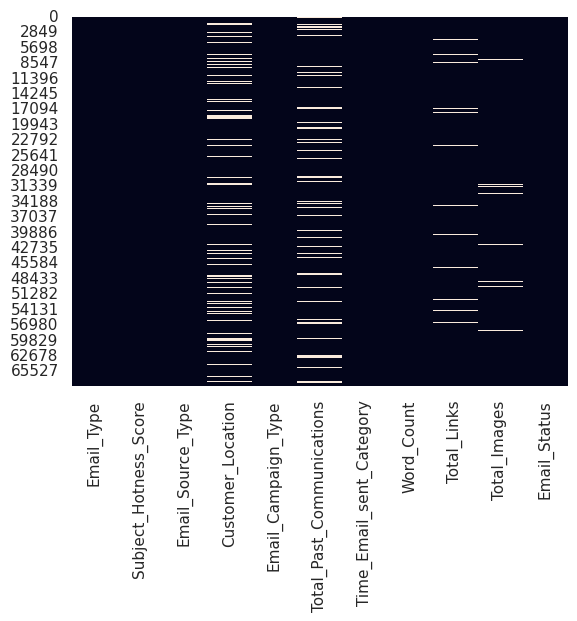

In [ ]:
# Handling Missing Values & Missing Value Imputation
sns.heatmap(df_emaildata.isnull(), cbar=False)
plt.show()

In [ ]:
# Missing value count using the funciton created earlier
missingVal

Missing Data Count  Missing Data Percentage
Customer_Location                       11595                16.963411
Total_Past_Communications                6825                 9.984931
Total_Links                              2201                 3.220049
Total_Images                             1677                 2.453440
Email_ID                                    0                 0.000000
Email_Type                                  0                 0.000000
Subject_Hotness_Score                       0                 0.000000
Email_Source_Type                           0                 0.000000
Email_Campaign_Type                         0                 0.000000
Time_Email_sent_Category                    0                 0.000000
Word_Count                                  0                 0.000000
Email_Status                                0                 0.000000

<ipython-input-10-609ce34842a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_emaildata[cat], hist= True)


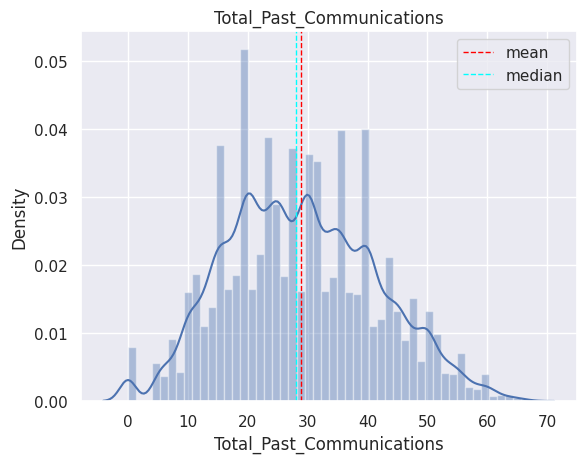

<ipython-input-10-609ce34842a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_emaildata[cat], hist= True)


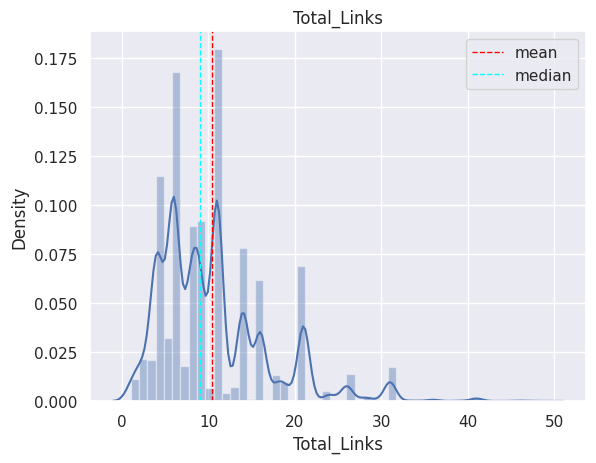

<ipython-input-10-609ce34842a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_emaildata[cat], hist= True)


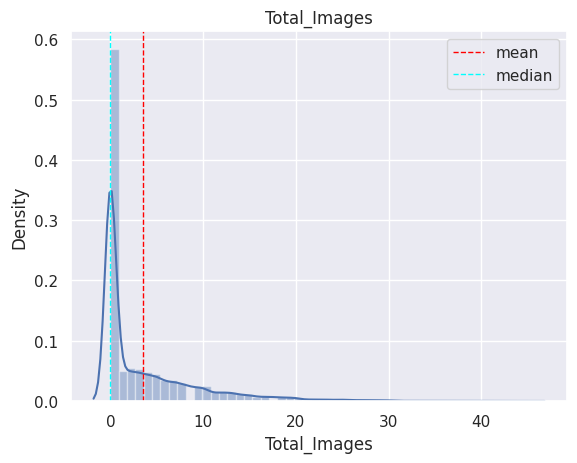

In [ ]:
#checking distribution of other null value to find correct way to impute
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
  sns.distplot(x=df_emaildata[cat], hist= True)
  feature=df_emaildata[cat]
  plt.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=1, label= 'mean')
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1, label='median')
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(f'{cat.title()}')
  plt.xlabel(cat)
  plt.show()
  print('='*100)

In [ ]:
# Replacing null value in customer location using mode
df_emaildata['Customer_Location'].fillna(df_emaildata['Customer_Location'].mode()[0], inplace=True)
df_emaildata['Total_Past_Communications'].fillna(df_emaildata['Total_Past_Communications'].mean(), inplace=True)
df_emaildata['Total_Images'].fillna(df_emaildata['Total_Images'].median(), inplace=True)
df_emaildata['Total_Links'].fillna(df_emaildata['Total_Links'].median(), inplace=True)

In [ ]:
# Data has been cleaned
df_emaildata.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

*Since the location contained categorical data and there was no way to pinpoint its actual location given its nearly 20% null value, deleting it could result in data loss, therefore I replaced it using mode.*

*Since the total previous communication displayed a normal distribution, its null value was replaced using the mean of the other two features, which were continuous data and could be replaced either by the mode or the median.*

### 2. Handling Outliers

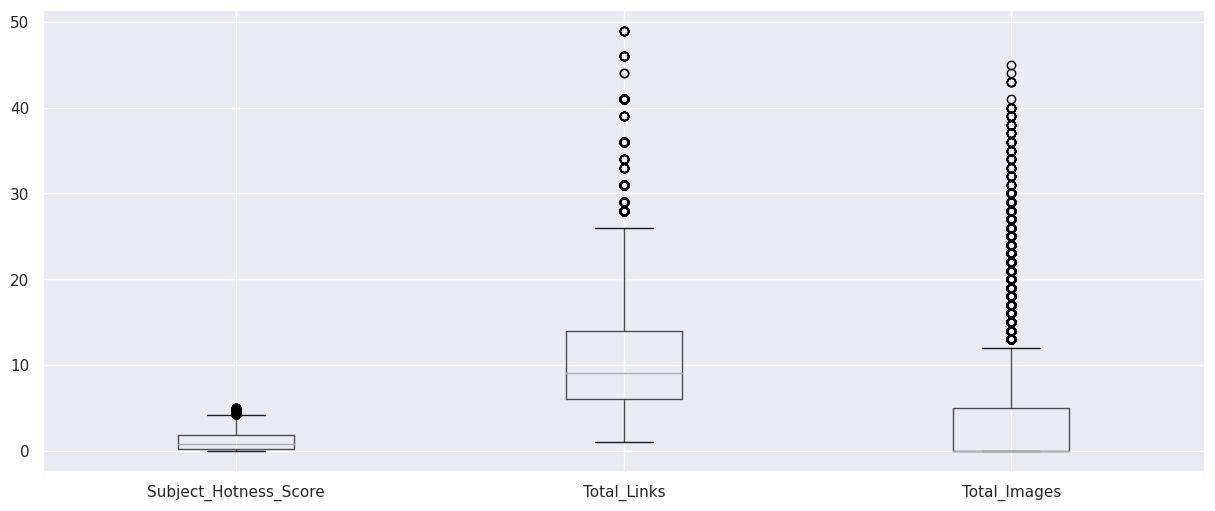

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,6))
numerical_col=['Subject_Hotness_Score','Total_Links', 'Total_Images'] # We have excluded Total_Past_Communications and Word_Count since they show symetric distribution
df_emaildata.boxplot(numerical_col)
plt.show()

In [ ]:
# Outer Fence
def outlier_treatment_skew(df,feature):
  IQR=df_emaildata[feature].quantile(0.75)-df_emaildata[feature].quantile(0.25)
  lower_bridge=df_emaildata[feature].quantile(0.25)-1.5*IQR
  upper_bridge=df_emaildata[feature].quantile(0.75)+1.5*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in numerical_col:
  df_emaildata.loc[df_emaildata[feature]<=outlier_treatment_skew(df=df_emaildata,feature=feature)[1], feature]=outlier_treatment_skew(df=df_emaildata,feature=feature)[1]
  df_emaildata.loc[df_emaildata[feature]>=outlier_treatment_skew(df=df_emaildata,feature=feature)[0], feature]=outlier_treatment_skew(df=df_emaildata,feature=feature)[0]

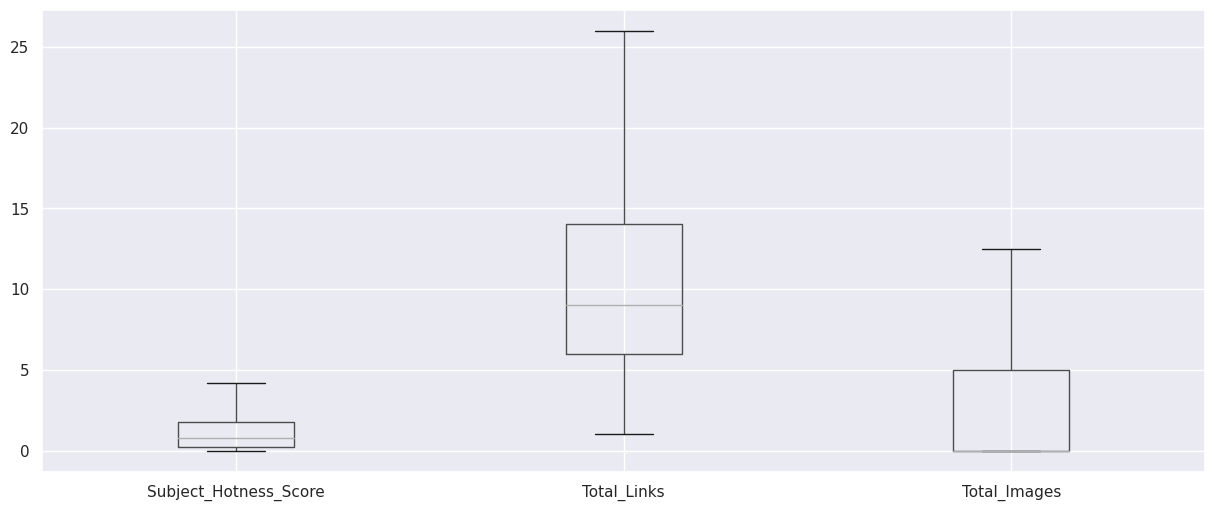

In [ ]:
# After Outlier treatment
plt.figure(figsize=(15,6))
numerical_col=['Subject_Hotness_Score','Total_Links', 'Total_Images']
df_emaildata.boxplot(numerical_col)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

*Rather than just eliminating them, I decide to apply the capping technique to cap the upper and lower limit values with the max and min values.*

### 3. Categorical Encoding

In [ ]:
# Creating separate copy for categorial feature
cat_feature_encoding=cat_feature.copy()
# Removing id and dependent variable
cat_feature_encoding.remove('Email_ID')
cat_feature_encoding.remove('Email_Status')

In [ ]:
# Create a contingency table
for cat in cat_feature_encoding:
  contingency_table=pd.crosstab(df_emaildata[cat], df_emaildata['Email_Status'])
  # calculate the chi-squared statistic and p-value
  chi2, p, dof, expected=chi2_contingency(contingency_table)
  print(cat)
  # check the p-value
  if p<0.05:
      print("There is a significant association between the categorical feature and the target variable")
  else:
      print("There is no significant association between the categorical feature and the target variable")
  print('\n')

Email_Type
There is a significant association between the categorical feature and the target variable


Email_Source_Type
There is a significant association between the categorical feature and the target variable


Customer_Location
There is no significant association between the categorical feature and the target variable


Email_Campaign_Type
There is a significant association between the categorical feature and the target variable


Time_Email_sent_Category
There is no significant association between the categorical feature and the target variable




*  *It is recommended to adopt the one-hot encoding technique over other binary, count, target, and ordinal encoding techniques because location does not display any ordinal relationship. Even with a single hot encoding on site, there is a chance that it will lead to poor model performance; thus, the decision to keep or remove the column will be made entirely by trial and error.*

In [ ]:
df_emaildatas=df_emaildata.copy()

In [ ]:
# Encode your categorical columns
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Customer_Location']
df_emaildatas=pd.get_dummies(df_emaildatas, columns=cat_col, drop_first=True)
df_emaildatas.head()

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Total_Links  \
0                    2.2                       33.0       440.0          8.0   
1                    2.1                       15.0       504.0          5.0   
2                    0.1                       36.0       962.0          5.0   
3                    3.0                       25.0       610.0         16.0   
4                    0.0                       18.0       947.0          4.0   

   Total_Images  Email_Status  Email_Type_2  Email_Source_Type_2  \
0           0.0             0             0                    1   
1           0.0             0             1                    0   
2           0.0             1             1                    0   
3           0.0             0             0                    1   
4           0.0             0             0                    1   

   Email_Campaign_Type_2  Email_Campaign_Type_3  Time_Email_sent_Category_2  \
0                      1                      0                           0   
1                      1                      0                           1   
2                      0                      1                           1   
3                      1                      0                           1   
4                      0                      1                           1   

   Time_Email_sent_Category_3  Customer_Location_B  Customer_Location_C  \
0                           0                    0                    0   
1                           0                    0                    0   
2                           0                    1                    0   
3                           0                    0                    0   
4                           0                    0                    1   

   Customer_Location_D  Customer_Location_E  Customer_Location_F  \
0                    0                    1                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    1                    0   
4                    0                    0                    0   

   Customer_Location_G  
0                    0  
1                    1  
2                    0  
3                    0  
4                    0

#### What all categorical encoding techniques have you used & why did you use those techniques?

*I have used here one hot encoding and their usages are:*

*  *Handling categorical variables with no ordinal relationship*

*  *Handling categorical variables with many unique values*

*  *Handling categorical variables with multiple levels*

*  *Handling categorical variables with missing values*

*  *Model interpretability*

*  *Compatibility with many machine learning models*


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
import string
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""

    # Lowercasing
    text=text.lower()

    # Expanding contractions
    text=contractions.fix(text)

    # Removing punctuation
    text=text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens=word_tokenize(text)

    # Removing stop words
    stop_words=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stop_words]

    # Removing numbers
    tokens=[word for word in tokens if not word.isdigit()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens=[lemmatizer.lemmatize(word) for word in tokens]

    # POS Tagging
    pos_tags=pos_tag(tokens)

    # Join tokens back to string for vectorization
    preprocessed_text =' '.join(tokens).strip()

    return preprocessed_text, pos_tags

# Apply the preprocessing function to the 'Subject' column
if 'Subject' in df_emaildata.columns:
    df_emaildata['Cleaned_Subject'], df_emaildata['POS_Tags']=zip(*df_emaildata['Subject'].apply(preprocess_text))

# Text Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_emaildata['Cleaned_Subject'])

# Add the TF-IDF features to the DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_emaildata = pd.concat([df_emaildata, tfidf_df], axis=1)

# Display the first few rows to verify the changes
df_emaildata[['Subject', 'Cleaned_Subject', 'POS_Tags']].head()

*  *Here no such need for Textual Data Preprocessing is actually required because we have most of our data in the form of numbers ie. integer data type and very few are string data type and this feature will only work on long texts ie. strictly needed for long objects data types.*

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df_emaildatas.drop(columns=['Email_ID'], inplace=True)

In [ ]:
# Total Number of Images and link
df_emaildatas['Total_link_Images']=df_emaildatas['Total_Images']+df_emaildatas['Total_Links']

In [ ]:
# Dropping total link and image
df_emaildatas.drop(columns =['Total_Links','Total_Images'], inplace=True)

In [ ]:
# Replacing infinity values with 0
np.isinf(df_emaildatas.select_dtypes(include=np.number)).values.sum()
df_emaildatas.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
df_emaildatas.head()

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0                    2.2                       33.0       440.0             0   
1                    2.1                       15.0       504.0             0   
2                    0.1                       36.0       962.0             1   
3                    3.0                       25.0       610.0             0   
4                    0.0                       18.0       947.0             0   

   Email_Type_2  Email_Source_Type_2  Email_Campaign_Type_2  \
0             0                    1                      1   
1             1                    0                      1   
2             1                    0                      0   
3             0                    1                      1   
4             0                    1                      0   

   Email_Campaign_Type_3  Time_Email_sent_Category_2  \
0                      0                           0   
1                      0                           1   
2                      1                           1   
3                      0                           1   
4                      1                           1   

   Time_Email_sent_Category_3  Customer_Location_B  Customer_Location_C  \
0                           0                    0                    0   
1                           0                    0                    0   
2                           0                    1                    0   
3                           0                    0                    0   
4                           0                    0                    1   

   Customer_Location_D  Customer_Location_E  Customer_Location_F  \
0                    0                    1                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    1                    0   
4                    0                    0                    0   

   Customer_Location_G  Total_link_Images  
0                    0                8.0  
1                    1                5.0  
2                    0                5.0  
3                    0               16.0  
4                    0                4.0

#### 2. Feature Selection

We can quantify multicollinearity using Variance Inflation Factors (VIF).

VIF = 1/(1-R^2) The more the value of R^2 is closer to 1 the more, VIF score tends to infinity. VIF starts with 1 and denotes that the variable has no correlation at all. VIF more than 5-10 can be considered as serious case of multicollinearity and can affect prediction models

In [ ]:
# Select your features wisely to avoid overfitting
# Independent variables
col=set(df_emaildatas.columns.values)-{"Email_Status"}
col

{'Customer_Location_B',
 'Customer_Location_C',
 'Customer_Location_D',
 'Customer_Location_E',
 'Customer_Location_F',
 'Customer_Location_G',
 'Email_Campaign_Type_2',
 'Email_Campaign_Type_3',
 'Email_Source_Type_2',
 'Email_Type_2',
 'Subject_Hotness_Score',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3',
 'Total_Past_Communications',
 'Total_link_Images',
 'Word_Count'}

In [ ]:
from  sklearn.feature_selection import VarianceThreshold
var_thres= VarianceThreshold(threshold=0.05)
var_thres.fit(df_emaildatas[col])
useless_col=[col for result in var_thres.get_support()if result!=True]
useless_col

[]

**Multicolinearity**

In [ ]:
# Multicollinearity by VIF
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
calc_vif(df_emaildatas[[i for i in col]])

variables        VIF
0                   Word_Count  10.934303
1    Total_Past_Communications  13.145518
2                 Email_Type_2   1.720278
3   Time_Email_sent_Category_3   1.965861
4   Time_Email_sent_Category_2   3.923386
5          Email_Source_Type_2   2.026835
6        Subject_Hotness_Score   5.202387
7        Email_Campaign_Type_3  19.420590
8        Email_Campaign_Type_2  49.933135
9          Customer_Location_G  17.860933
10         Customer_Location_C   3.790406
11           Total_link_Images   3.221398
12         Customer_Location_D   4.584652
13         Customer_Location_F   3.151091
14         Customer_Location_E   5.959847
15         Customer_Location_B   3.110183

In [ ]:
calc_vif(df_emaildatas[[i for i in col if i not in ["Email_Campaign_Type_2","Customer_Location_G"]]])

variables       VIF
0                   Word_Count  5.236776
1    Total_Past_Communications  5.079672
2                 Email_Type_2  1.629651
3   Time_Email_sent_Category_3  1.898686
4   Time_Email_sent_Category_2  3.731034
5          Email_Source_Type_2  1.973281
6        Subject_Hotness_Score  2.567744
7        Email_Campaign_Type_3  2.203338
8          Customer_Location_C  1.154225
9            Total_link_Images  3.157848
10         Customer_Location_D  1.197085
11         Customer_Location_F  1.118055
12         Customer_Location_E  1.272863
13         Customer_Location_B  1.116117

In [ ]:
new_num_features=calc_vif(df_emaildatas[[i for i in col if i not in ["Email_Campaign_Type_2","Customer_Location_G"]]]).variables.values
new_num_features

array(['Word_Count', 'Total_Past_Communications', 'Email_Type_2',
       'Time_Email_sent_Category_3', 'Time_Email_sent_Category_2',
       'Email_Source_Type_2', 'Subject_Hotness_Score',
       'Email_Campaign_Type_3', 'Customer_Location_C',
       'Total_link_Images', 'Customer_Location_D', 'Customer_Location_F',
       'Customer_Location_E', 'Customer_Location_B'], dtype=object)

In [ ]:
df_emaildatas.drop(columns=["Email_Campaign_Type_2","Customer_Location_G"],inplace=True)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

In [ ]:
# Embedded Method of validating the feature importances of selected features
from sklearn.ensemble import RandomForestClassifier
def randomforest_embedded(x,y):
  # Create the random forest with hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  model.fit(x,y)
  # get the importance of the resulting features
  importances= model.feature_importances_
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  final_df= final_df.sort_values('Importances')
  return final_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=df_emaildatas[new_num_features],y=df_emaildatas["Email_Status"])

Features  Importances
13         Customer_Location_B     0.009685
11         Customer_Location_F     0.009783
8          Customer_Location_C     0.011259
2                 Email_Type_2     0.012635
10         Customer_Location_D     0.012845
3   Time_Email_sent_Category_3     0.013976
12         Customer_Location_E     0.015088
5          Email_Source_Type_2     0.017272
4   Time_Email_sent_Category_2     0.019519
7        Email_Campaign_Type_3     0.031074
6        Subject_Hotness_Score     0.145850
9            Total_link_Images     0.207836
1    Total_Past_Communications     0.227275
0                   Word_Count     0.265903

*  *Drop the columns which are insignificant for our dataset.*

In [ ]:
# Dropping insignificant columns of dataset
drop=["Customer_Location_B","Customer_Location_F","Customer_Location_C","Email_Type_2","Customer_Location_D","Time_Email_sent_Category_3","Customer_Location_E"]
df_emaildatas.drop(drop,inplace=True,axis=1)

In [ ]:
df_emaildatas.shape

(68353, 8)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_emaildatas.describe().columns.values:
  if abs(df_emaildatas[i].mean()-df_emaildatas[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)
# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Word_Count', 'Email_Status', 'Email_Source_Type_2', 'Email_Campaign_Type_3', 'Time_Email_sent_Category_2', 'Total_link_Images']


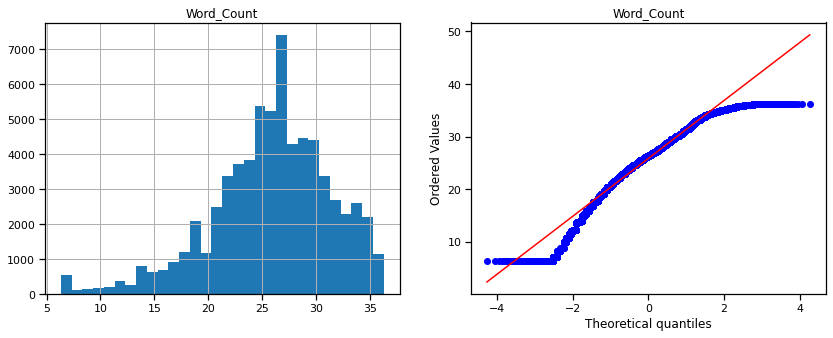

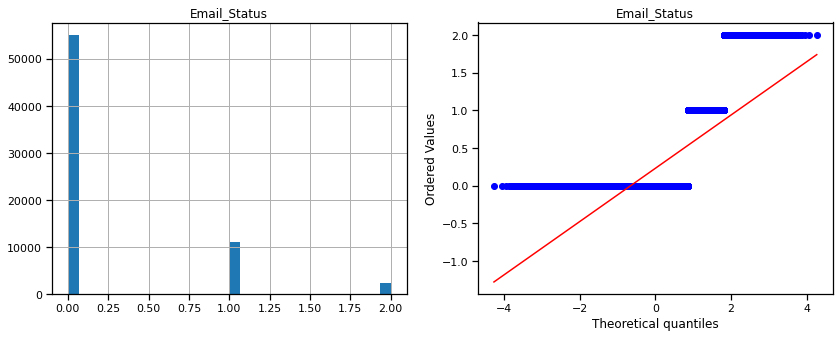

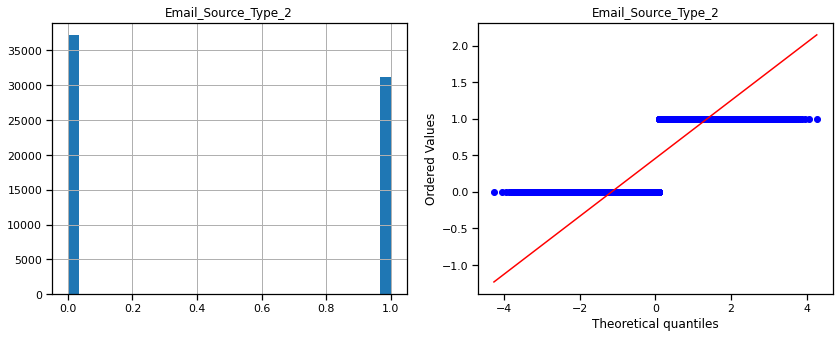

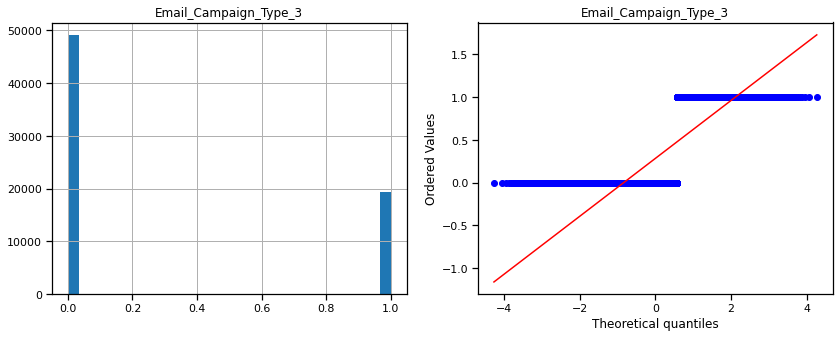

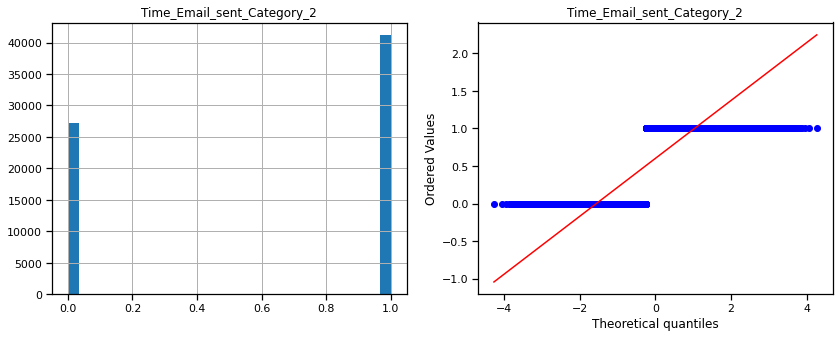

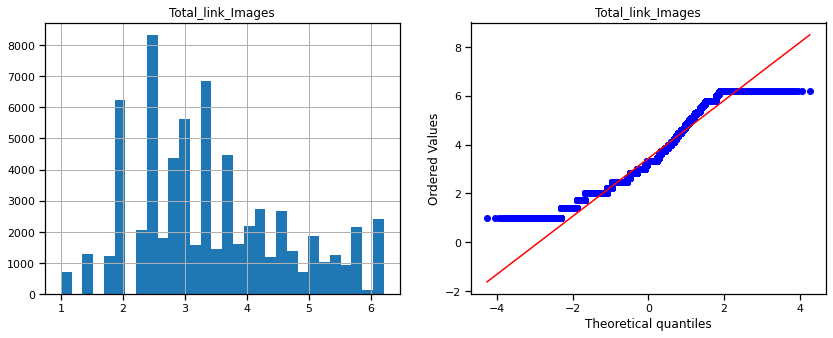

In [ ]:
# Vizualization
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df_emaildatas[variable].hist(bins=30)
  plt.title(variable)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_emaildatas[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

In [ ]:
# Since categorial feature does not required transformation hence take continuous feature
for col in ['Word_Count',"Total_link_Images","Subject_Hotness_Score"]:    # I did not take Total_Past_Communications since it already was normally distributed.
  #doing square root transformation
  df_emaildatas[col]=np.sqrt(df_emaildatas[col])

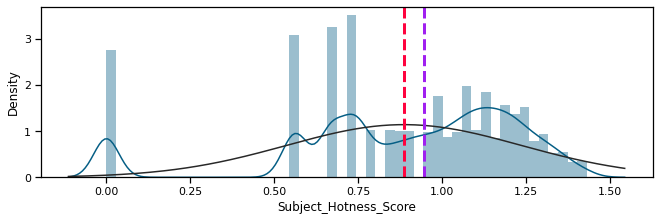

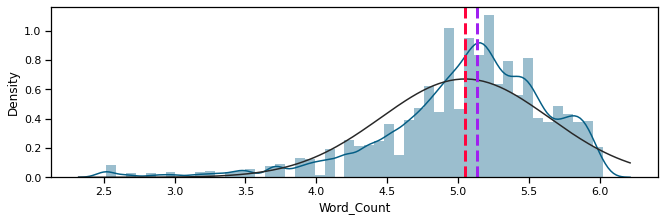

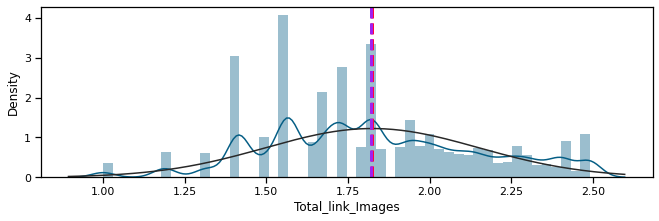

In [ ]:
# Distribution plot of transform features with the value of mean and median.
for i, col in enumerate(['Subject_Hotness_Score','Word_Count',"Total_link_Images"]) :
    plt.figure(figsize=(18,18))
    plt.subplot(6,2,i+1)
    sns.distplot(df_emaildatas[col], color='#055E85', fit=norm)
    feature = df_emaildatas[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label='mean')
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median')
    plt.tight_layout()
    plt.show()

*  *I have used square-root transformation in all continuous features which were moderately skewed.*

### 6. Data Scaling

In [ ]:
# Scaling your data
# Standard scaler
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count', 'Total_link_Images']:
            df_emaildatas[col] = StandardScaler().fit_transform(df_emaildatas[col].values.reshape(-1, 1))

In [ ]:
df_emaildatas.head(2)

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0               1.107524                   0.341914   -0.871042             0   
1               1.041857                  -1.171444   -0.607988             0   

   Email_Source_Type_2  Email_Campaign_Type_3  Time_Email_sent_Category_2  \
0                    1                      0                           0   
1                    0                      0                           1   

   Total_link_Images  
0          -0.497158  
1          -0.985192

##### Which method have you used to scale you data and why?

*Since their distributions are nearly all normal, the features were scaled using a conventional scaler.*

*Feature scaling should be used when the technique we are applying assumes that your features have a comparable range. Use feature scaling if there is a significant difference between the feature ranges. We can leave them as is if the range does not differ significantly, for example, if one of them is between 0 and 2 while the other one is between -1 and 0.5. But if the ranges are, say, between -2 and 2 and between -100 and 100, we should apply feature scaling.*

*When the distribution of your data is Gaussian, use standardization. If the distribution of your data is not Gaussian, use normalization.*

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

*This dataset doesnot need any dimensionality reduction. Dimensionality reduction reduces the number of features in a dataset, crucial for large feature sets to prevent overfitting and computational slowness. Techniques like PCA and SVD are commonly employed for this purpose.*

*  *Dimensionality reduction is beneficial for several reasons. It reduces dataset size, which is crucial for large datasets. Moreover, it enhances machine learning model performance by decreasing the number of features, resulting in faster computation and improved generalization to new data.*

*  *Dimensionality reduction helps mitigate the curse of dimensionality by reducing the number of dimensions in data. As dimensions increase, space volume grows exponentially, affecting nearest neighbor searches due to larger distances between points.*

*  *Dimensionality reduction aids in visualizing high-dimensional data by reducing dimensions, as visualizing beyond three dimensions is challenging. This simplification helps to discern patterns more effectively.*

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not needed in this case

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(df_emaildatas.drop("Email_Status",axis=1),df_emaildatas["Email_Status"],test_size = 0.2, random_state = 0)
print(f"There are {y_train.shape[0]} rows for training and {y_test.shape[0]} for testing")

##### What data splitting ratio have you used and why?

*I chose an 80:20 split in this instance because splitting data in any other ratio—80/20 or 70/30—doesn't matter unless there are less values in the collection. There are two conflicting issues, though: parameter estimations have more volatility when there are fewer training data. It is therefore desirable to divide the data so that neither the variance in the training set nor the variance in the test set is too high. This is because performance statistics will have greater volatility with fewer testing data.*

*80/20 is a ratio that is quite popular and is also known as the Pareto principle. If you employ that ratio, it's usually a safe stake.*

### 9. Handling Imbalanced Dataset

In [ ]:
# Handling Imbalanced Dataset (If needed)
df['Email_Status'].value_counts()

##### Do you think the dataset is imbalanced? Explain Why.

*Imbalanced datasets are a key issue in supervised machine learning involving multiple classes. Imbalance occurs when the number of data points for each class differs significantly. For example, a balanced dataset has an equal number of points for each class, but slight imbalances (e.g., 60:40) typically don't impact performance much. However, severe imbalances (e.g., 90:10) can degrade model performance, requiring modifications to standard optimization and performance measures.*

*In our case, the class distribution is 80:16:4, which is highly imbalanced. This imbalance can lead to a biased model that frequently predicts the majority class. Therefore, it is crucial to balance the dataset before model creation to improve performance.*

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [ ]:
# SMOTE
# Handaling imbalance dataset using SMOTE
sm=SMOTE(random_state=42)
X_train, y_train=sm.fit_resample(X_train, y_train)

# describes info about train and test set
print('Number transactions X_train dataset: ', X_train.shape)
print('Number transactions y_train dataset: ', y_train.shape)
print('Number transactions X_test dataset: ', X_test.shape)
print('Number transactions y_test dataset: ', y_test.shape)

Number transactions X_train dataset:  (131817, 7)
Number transactions y_train dataset:  (131817,)
Number transactions X_test dataset:  (13671, 7)
Number transactions y_test dataset:  (13671,)


Class=0, n=43939 (33.333%)
Class=1, n=43939 (33.333%)
Class=2, n=43939 (33.333%)


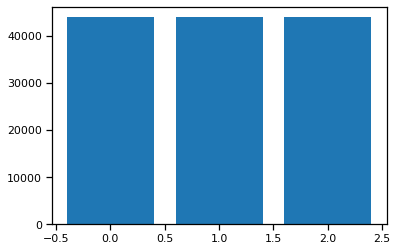

In [ ]:
# Visualization of resampled data
counter=Counter(y_train)
for key,value in counter.items():
  per = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

*I've used SMOTE (Synthetic Minority Over-sampling Technique) to balance my 80:16:4 dataset. In machine learning, unbalanced datasets are common, and most algorithms perform poorly with such data. SMOTE addresses this issue by generating synthetic minority samples, improving classifier performance.*

*SMOTE enhances data balance by creating synthetic samples through interpolation of existing minority samples. Unlike simple oversampling, which duplicates data points, SMOTE generates new, slightly different data points, making it a more sophisticated and effective technique.*

*Given its advantages, SMOTE is a superior choice for balancing datasets, which is why I opted to use it.*

## ***7. ML Model Implementation***

### ML Model - 1

**Implementing LogisticRegression**

In [ ]:
# ML Model - 1 Implementation
lr=LogisticRegression(fit_intercept=True, class_weight='balanced', multi_class='multinomial')

# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
lr.coef_

array([[ 0.21733498, -0.17074136,  0.35907297,  0.05906501, -0.61529874,
        -0.01038689,  0.0520596 ],
       [ 0.16561905,  0.07116728, -0.19332974,  0.08876257,  0.38201515,
        -0.01907797, -0.08661147],
       [-0.38295403,  0.09957409, -0.16574324, -0.14782758,  0.23328359,
         0.02946486,  0.03455187]])

In [ ]:
# Checking the intercept value
lr.intercept_

array([ 0.35758183, -0.12148654, -0.23609529])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability_lr=lr.predict_proba(X_train)
test_probability_lr=lr.predict_proba(X_test)

In [ ]:
# Get the predicted classes
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Define a function which print the result of Evaluation metrics.
def print_metrics(actual_train,actual_test,predicted_train,predicted_test,test_probability):
  print('accuracy on train data is {}'.format(accuracy_score(actual_train,predicted_train)))
  print('accuracy on test data is {}'.format(accuracy_score(actual_test,predicted_test)))
  print('precision on test data is {}'.format(precision_score(actual_test,predicted_test,average='weighted')))
  print('recall on test data is {}'.format(recall_score(actual_test,predicted_test,average='weighted')))
  print('f1 Score on test data is {}'.format(f1_score(actual_test,predicted_test,average='weighted')))
  print('roc_auc_score on test data is {}'.format(roc_auc_score(actual_test, test_probability,multi_class='ovr',average='weighted')))


In [ ]:
# Printing all metrics
print_metrics(y_train,y_test,y_pred_train_lr,y_pred_test_lr,test_probability_lr)

accuracy on train data is 0.5031976148751679
accuracy on test data is 0.5837905054494916
precision on test data is 0.7640873560193815
recall on test data is 0.5837905054494916
f1 Score on test data is 0.6519065631657515
roc_auc_score on test data is 0.711399887567588


In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
def confusion_metrics(actual_train,actual_test,predicted_train,predicted_test):
  labels=['Ignored', 'Opened', 'Acknowledged']
  sns.set_context('notebook')
  plt.figure(figsize=(20,8))

  ax1=plt.subplot(1,2,1)
  cm1 = confusion_matrix(actual_train, predicted_train)
  sns.heatmap(cm1, annot=True, ax=ax1) #annot=True to annotate cells
  ax1.set_xlabel('Predicted labels')
  ax1.set_ylabel('True labels')
  ax1.set_title('Confusion Matrix for training data')
  ax1.xaxis.set_ticklabels(labels)
  ax1.yaxis.set_ticklabels(labels)
  print(' ')

  ax2= plt.subplot(1,2,2)
  cm2 = confusion_matrix(actual_test, predicted_test)
  sns.heatmap(cm2, annot=True, ax=ax2)
  # labels, title and ticks
  ax2.set_xlabel('Predicted labels')
  ax2.set_ylabel('True labels')
  ax2.set_title('Confusion Matrix for testing data')
  ax2.xaxis.set_ticklabels(labels)
  ax2.yaxis.set_ticklabels(labels)

  plt.show()

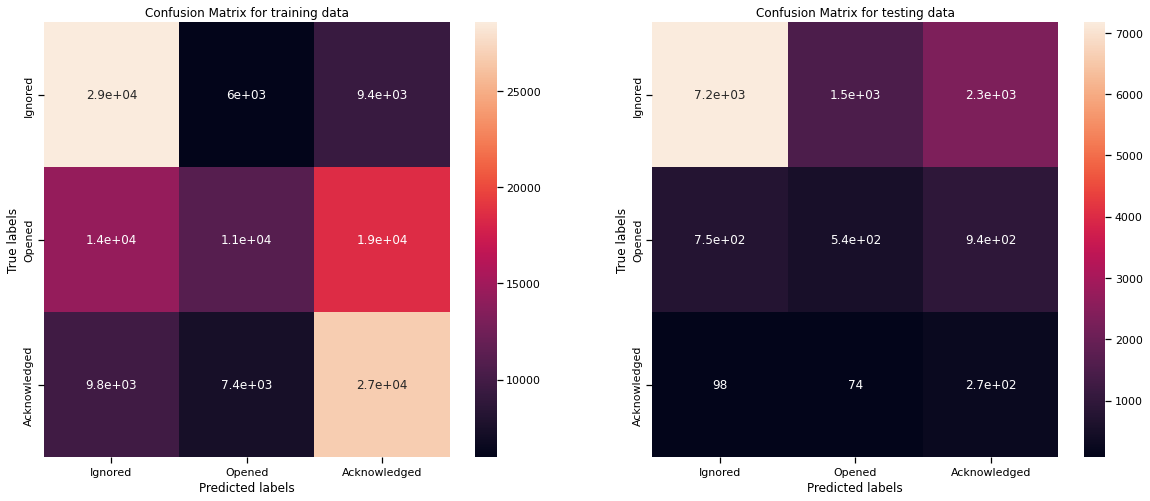

In [ ]:
confusion_metrics(y_train,y_test,y_pred_train_lr,y_pred_test_lr)

*I built the model using the logistic regression approach. I didn't get the best outcome.*

*I found that for the training dataset, the f1-score for ignored emails was 61%, recall was 58%, and precision was 66%. Emails that were opened in class 2 had precision of 31%, recall of 46%, and f1-score of 37%; emails that were acknowledged in class 3 had precision of 62%, recall of 52%, and f1-score of 57%. With a roc auc score of 71%, accuracy is 53%, average precision, recall, and f1_score are 53%, 52%, and 54%, respectively.*

*I found that for the test dataset, the f1-score for ignored emails was 76%, recall was 88%, and precision was 67%. Email opened in class 2 had precision of 31%, recall of 28%, and f1-score of 29%; email acknowledged in class 3 had precision of 47%, recall of 7%, and f1-score of 12%. With a roc auc score of 69%, accuracy is 60% and average precision, recall, and f1_score are 48%, 41%, and 39%, respectively.*

*For test :*

*  *7324 = the number of instances that were predicted as class Ignored and are actually class Ignored*
*  *1663 = the number of instances that were predicted as class Ignored and are actually class Opened*
*  *2015 = the number of instances that were predicted as class Ignored and are actually class Acknowledged*
*  *845 = the number of instances that were predicted as class Opened and are actually class Ignored*
*  *681 = the number of instances that were predicted as class Opened and are actually class Opened*
*  *703 = the number of instances that were predicted as class Opened and are actually class Acknowledged*
*  *125 = the number of instances that were predicted as class Acknowledged and are actually class Ignored*
*  *106 = the number of instances that were predicted as class Acknowledged and are actually class Opened*
*  *209 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged*

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model=LogisticRegression(fit_intercept=True, max_iter=10000, class_weight='balanced', multi_class='multinomial')
solvers=['lbfgs']  # lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno.
penalty=['l2']
c_values=[1000,100, 10, 1.0, 0.1, 0.01,0.001]
# Define grid search
grid=dict(solver=solvers,penalty=penalty,C=c_values)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search=GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.000000 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability_tunned_lr = grid_result.predict_proba(X_train)
test_probability_tunned_lr = grid_result.predict_proba(X_test)

In [ ]:
# Predict on the model
# Get the predicted classes
y_pred_train_tunned_lr=grid_result.predict(X_train)
y_pred_test_tunned_lr=grid_result.predict(X_test)

In [ ]:
# Print all metrics
print_metrics(y_train,y_test,y_pred_train_tunned_lr,y_pred_test_tunned_lr,test_probability_tunned_lr)

accuracy on train data is 0.503182442325345
accuracy on test data is 0.5837905054494916
precision on test data is 0.7640873560193815
recall on test data is 0.5837905054494916
f1 Score on test data is 0.6519065631657515
roc_auc_score on test data is 0.7114016782840624


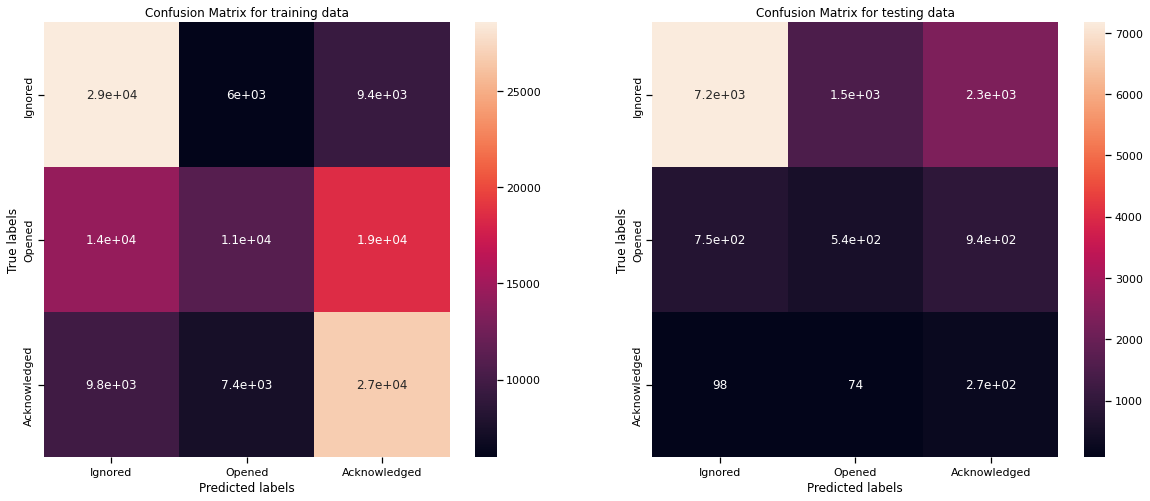

In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
confusion_metrics(y_train,y_test,y_pred_train_tunned_lr,y_pred_test_tunned_lr)

##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV, which finds the ideal hyperparameters to improve the model's performance using the Grid Search approach.*

*Finding the ideal hyperparameter settings will help us obtain the best prediction performance out of our model. However, the question of how to identify these ideal hyperparameter sets emerges. To identify the ideal hyperparameters, one can attempt the Manual Search approach, which involves a hit-and-trial process that would take a very long time to develop a single model.*

*This led to the introduction of techniques like GridSearch and Random Search. Grid Search computes the performance for every possible combination of all the provided hyperparameters and their values, then chooses the hyperparameter with the optimal value. Because of this, processing becomes costly and time-consuming depending on how many hyperparameters are used.*

*Cross-validation is done in GridSearchCV in addition to Grid Search. Cross-validation is applied to the model's training.*

*I have utilized the GridsearCV approach for hyperparameter optimization because of this.*

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*I found that for the training dataset, the f1-score for ignored emails was 61%, recall was 57%, and precision was 66%. Email opened in class 2 had a precision of 30%, recall in class 46%, and f1-score of 36%; email acknowledged in class 3 had a precision of 63%, recall in class 52%, and f1-score in class 57%. With a roc auc score of 71%, accuracy is 53%, average precision, recall, and f1_score are 53%, 52%, and 52%, respectively.*

*I found that for the test dataset, the f1-score for ignored emails was 76%, recall was 88%, and precision was 67%. Email opened in class 2 had a precision of 30%, recall in class 28%, and f1-score of 29%; email acknowledged in class 3 had a precision of 48%, recall in class 7%, and f1-score of 12%. With a roc auc score of 69%, accuracy is 60% and average precision, recall, and f1_score are 48%, 41%, and 39%, respectively.*


### ML Model - 2

**Implementing RandomForestClassifier**

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model=RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_rf=rf_model.predict(X_train)
y_pred_test_rf=rf_model.predict(X_test)

In [ ]:
# Get the predicted probabilities
train_probability_rf=rf_model.predict_proba(X_train)
test_probability_rf=rf_model.predict_proba(X_test)

*  *I have used Random Forest Classifier to create the model.*

*  *A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.*

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Print all metrics
print_metrics(y_train,y_test,y_pred_train_rf,y_pred_test_rf,test_probability_rf)

accuracy on train data is 0.9988241273887283
accuracy on test data is 0.7533464998902787
precision on test data is 0.7398200585263485
recall on test data is 0.7533464998902787
f1 Score on test data is 0.7456556107282959
roc_auc_score on test data is 0.7271790089534658


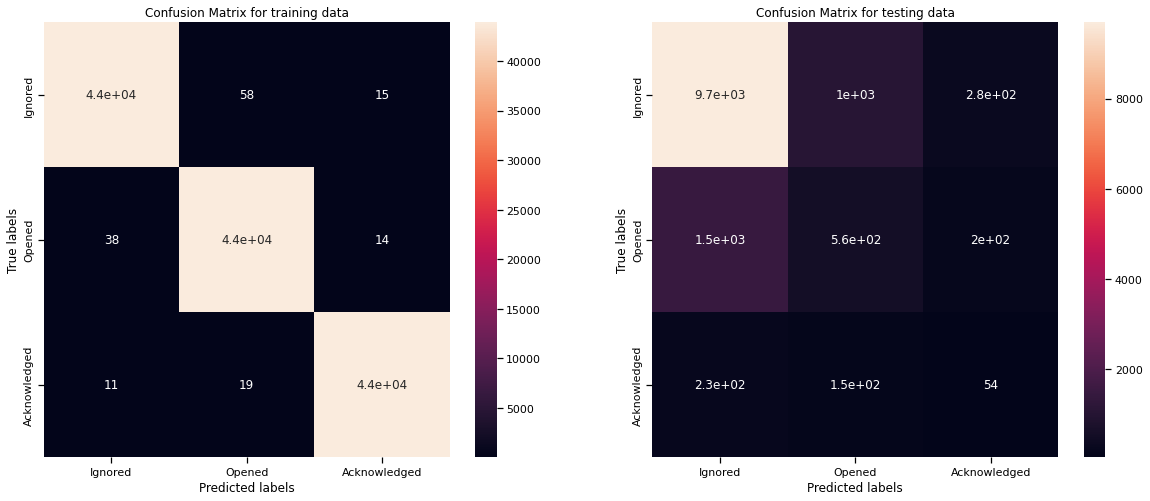

In [ ]:
# Visualizing evaluation Metric Score chart
confusion_metrics(y_train,y_test,y_pred_train_rf,y_pred_test_rf)

*To build the model, I employed the Random Forest technique. I saw overfitting as soon as I arrived.*

*In the training dataset, I discovered 100% of the data.*

*I found 86% precision, 86% recall, and 86% f1-score for ignored emails in the test dataset. Email opened in class 2 had a precision of 31%, recall of 33%, and f1-score of 32%; email acknowledged in class 3 had a precision of 14%, recall of 10%, and f1-score of 12%. With a roc auc score of 71%, accuracy is 75% and average precision, recall, and f1_score are 44%, 43%, and 43%, respectively.*

*For test:*

*  *9452 = the number of instances that were predicted as class Ignored and are actually class Ignored*
*  *1235 = the number of instances that were predicted as class Ignored and are actually class Opened*
*  *315 = the number of instances that were predicted as class Ignored and are actually class Acknowledged*
*  *1333 = the number of instances that were predicted as class Opened and are actually class Ignored*
*  *691 = the number of instances that were predicted as class Opened and are actually class Opened*
*  *205 = the number of instances that were predicted as class Opened and are actually class Acknowledged*
*  *214 = the number of instances that were predicted as class Acknowledged and are actually class Ignored*
*  *166 = the number of instances that were predicted as class Acknowledged and are actually class Opened*
*  *60 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged*

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2# ML Model - 2 Implementation with hyperparameter optimization techniques
# Number of trees
n_estimators=[50,80,100]
# Maximum depth of trees
max_depth=[4,6,8]
# Minimum number of samples required to split a node
min_samples_split=[50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf=[40,50]
# HYperparameter Grid
param_dict={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}
# Create an instance of the RandomForestClassifier
rf_model=RandomForestClassifier()
# Grid search
rf_grid=GridSearchCV(estimator=rf_model, param_grid = param_dict, cv = 5, verbose=2, scoring='f1')

# Fit the Algorithm
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1', verbose=2)

In [ ]:
# Best parameter
print('Best: %f using %s' % (rf_grid.best_score_, rf_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_rfh=rf_grid.predict(X_train)
y_pred_test_rfh=rf_grid.predict(X_test)

In [ ]:
# Get the predicted probabilities
train_probability_rfh=rf_grid.predict_proba(X_train)
test_probability_rfh=rf_grid.predict_proba(X_test)

##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV, which finds the ideal hyperparameters to improve the model's performance using the Grid Search approach.*

*Finding the ideal hyperparameter settings will help us obtain the best prediction performance out of our model. However, the question of how to identify these ideal hyperparameter sets emerges. To identify the ideal hyperparameters, one can attempt the Manual Search approach, which involves a hit-and-trial process that would take a very long time to develop a single model.*

*This led to the introduction of techniques like GridSearch and Random Search. Grid Search computes the performance for every possible combination of all the provided hyperparameters and their values, then chooses the hyperparameter with the optimal value. Because of this, processing becomes costly and time-consuming depending on how many hyperparameters are used.*

*Cross-validation is done in GridSearchCV in addition to Grid Search. Cross-validation is applied to the model's training.*

*I have utilized the GridsearCV approach for hyperparameter optimization because of this.*

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Prting all metrics
print_metrics(y_train,y_test,y_pred_train_rfh,y_pred_test_rfh,test_probability_rfh)

accuracy on train data is 0.5499821722539582
accuracy on test data is 0.6565723063418916
precision on test data is 0.7720459271594512
recall on test data is 0.6565723063418916
f1 Score on test data is 0.7018483803379467
roc_auc_score on test data is 0.753429682576904


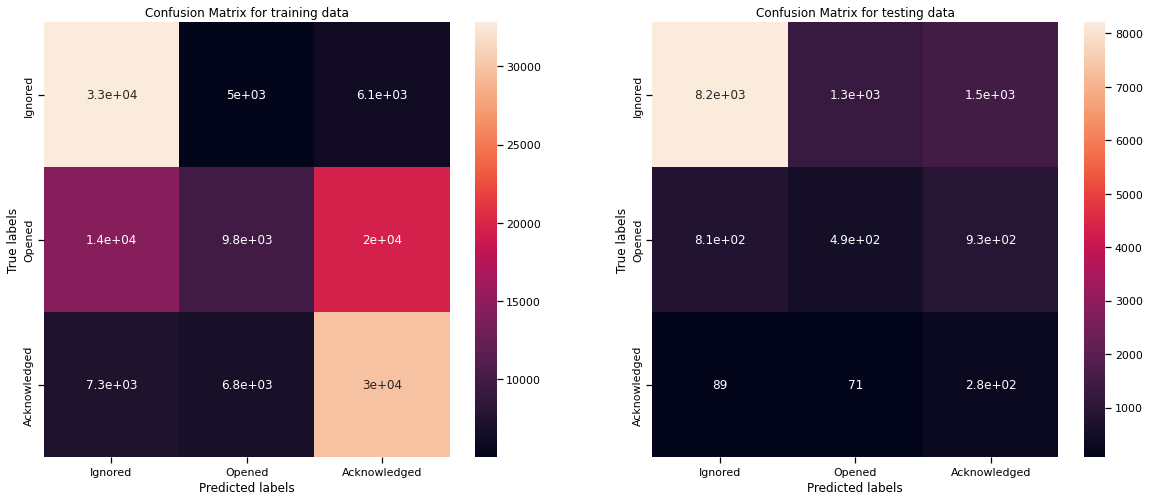

In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
confusion_metrics(y_train,y_test,y_pred_train_rfh,y_pred_test_rfh)

*I found that for the training dataset, the f1-score for ignored emails was 66%, recall was 57%, and precision was 77%. Email opened received a precision of 21%, recollection of 45%, and f1-score of 28% for class 2, whereas email acknowledged received a precision of 64%, recall of 54%, and f1-score of 59% for class 3. With a roc auc score of 74%, accuracy is 54%, average precision, recall, and f1_score are 54%, 52%, and 51%, respectively.*

*I found that for the test dataset, the f1-score for ignored emails was 83%, recall was 88%, and precision was 77%. Email opened in class 2 had a precision of 19%, recall of 27%, and f1-score of 22%; email acknowledged in class 3 had a precision of 57%, recall of 10%, and f1-score of 17%. With a roc auc score of 74%, accuracy is 67%, while average precision, recall, and f1_score are 51%, 42%, and 41%, respectively.*

*There is no such improvement in the result while using Cross- Validation & Hyperparameter Tuning because our dataset is large enough to give accurate result using Hold-Out Method.*

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

*I have used these metrices for evaluation of the model and their impact on business are as follows:*

*  *Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.*

*  *Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.*

*  *Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.*

*  *F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.*

*  *ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.*

*In summary, the Random Forest Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.*

### ML Model - 3

**Implementing XgBoost Classifier**

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_xg = xg_models.predict(X_train)
y_pred_test_xg = xg_models.predict(X_test)

In [ ]:
# Get the predicted probabilities
train_probability_xg = xg_models.predict_proba(X_train)
test_probability_xg = xg_models.predict_proba(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Print the evaluation matrics
print_metrics(y_train,y_test,y_pred_train_xg,y_pred_test_xg,test_probability_xg)

accuracy on train data is 0.8109348566573356
accuracy on test data is 0.7934313510350377
precision on test data is 0.7530595639502877
recall on test data is 0.7934313510350377
f1 Score on test data is 0.7662235580576965
roc_auc_score on test data is 0.7611243710738123


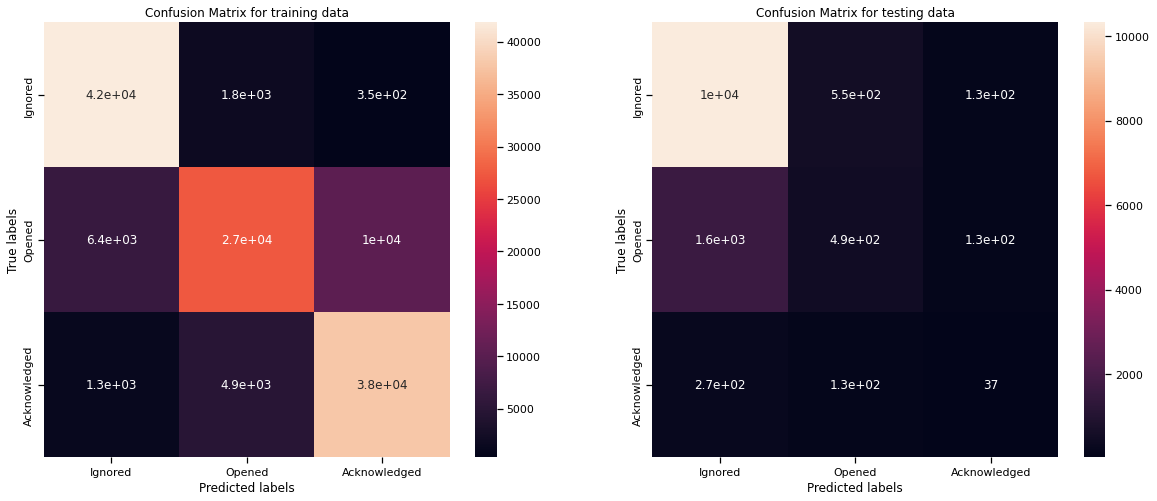

In [ ]:
# Visualizing evaluation Metric Score chart(Confusion Matrics)
confusion_metrics(y_train,y_test,y_pred_train_xg,y_pred_test_xg)

*I found 95% precision, 85% recall, and 90% f1-score for ignored emails in the training dataset. Emails that were opened in class 2 had precision of 62%, recall of 82%, and a f1-score of 70%; emails that were acknowledged in class 3 had precision of 87%, recall of 77%, and a f1-score of 82%. With a roc auc score of 93%, accuracy is 81%, and average precision, recall, and f1_score are 81%, 81%, and 81%, respectively.*

*I found that for the test dataset, the f1-score for ignored emails was 89%, recall was 85%, and precision was 93%. Email opened in class 2 had a precision of 19%, recall of 41%, and f1-score of 26%; email acknowledged in class 3 had a precision of 13%, recall of 12%, and f1-score of 13%. With a roc auc score of 75%, accuracy is 79%, and average precision, recall, and f1_score are 42%, 46%, and 43%, respectively.*

*For test:*

*  *10271 = the number of instances that were predicted as class Ignored and are actually class Ignored*
*  *500 = the number of instances that were predicted as class Ignored and are actually class Opened*
*  *231 = the number of instances that were predicted as class Ignored and are actually class Acknowledged*
*  *1595 = the number of instances that were predicted as class Opened and are actually class Ignored*
*  *427 = the number of instances that were predicted as class Opened and are actually class Opened*
*  *207 = the number of instances that were predicted as class Opened and are actually class Acknowledged*
*  *275 = the number of instances that were predicted as class Acknowledged and are actually class Ignored*
*  *106 = the number of instances that were predicted as class Acknowledged and are actually class Opened*
*  *59 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged*

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# Hyperparameter Grid
param_dict={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}
# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid=GridSearchCV(estimator=xg_model,param_grid = param_dict, cv = 5, verbose=2, scoring='roc_auc')
xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[11:03:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   8.1s
[11:03:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.0s
[11:04:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   7.8s
[11:04:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.0s
[11:04:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

In [ ]:
#best parameter
print('Best: %f using %s' % (xg_grid.best_score_, xg_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_xgh=xg_grid1.predict(X_train)
y_pred_test_xgh=xg_grid1.predict(X_test)

In [ ]:
# Get the predicted probabilities
train_probability_xgh=xg_grid1.predict_proba(X_train)
test_probability_xgh=xg_grid1.predict_proba(X_test)

##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV, which finds the ideal hyperparameters to improve the model's performance using the Grid Search approach.*

*Finding the ideal hyperparameter settings will help us obtain the best prediction performance out of our model. However, the question of how to identify these ideal hyperparameter sets emerges. To identify the ideal hyperparameters, one can attempt the Manual Search approach, which involves a hit-and-trial process that would take a very long time to develop a single model.*

*This led to the introduction of techniques like GridSearch and Random Search. Grid Search computes the performance for every possible combination of all the provided hyperparameters and their values, then chooses the hyperparameter with the optimal value. Because of this, processing becomes costly and time-consuming depending on how many hyperparameters are used.*

*Cross-validation is done in GridSearchCV in addition to Grid Search. Cross-validation is applied to the model's training.*

*I have utilized the GridsearCV approach for hyperparameter optimization because of this.*

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Print all metrics
print_metrics(y_train,y_test,y_pred_train_xgh,y_pred_test_xgh,test_probability_xgh)

accuracy on train data is 0.6696404864319473
accuracy on test data is 0.7390095823275546
precision on test data is 0.7702144877620484
recall on test data is 0.7390095823275546
f1 Score on test data is 0.7521666291355136
roc_auc_score on test data is 0.7621121284561899


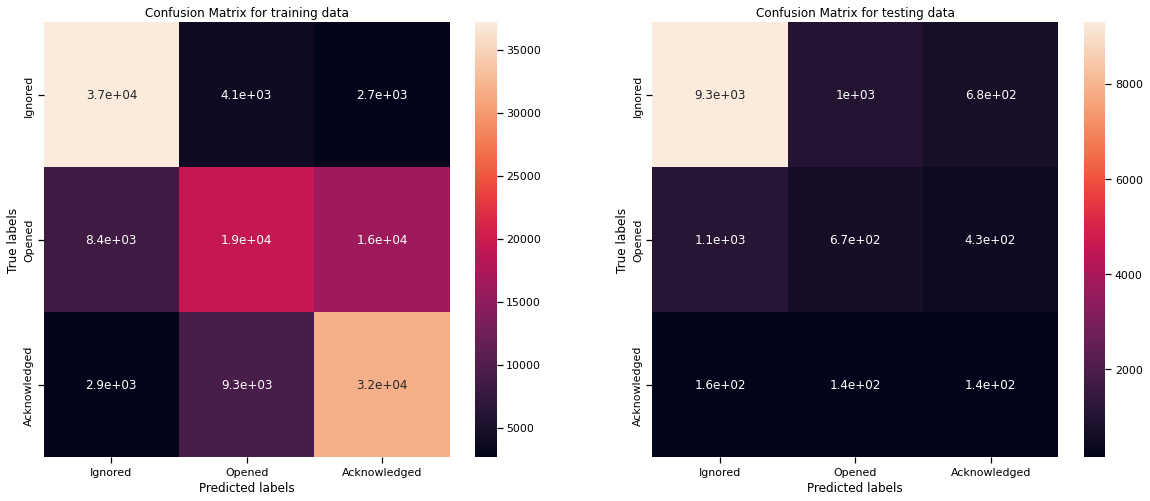

In [ ]:
# Visualizing evaluation Metric Score chart that is confusion matrix for both training and testing data
confusion_metrics(y_train,y_test,y_pred_train_xgh,y_pred_test_xgh)

*I found that for the training dataset, the f1-score for ignored emails was 73%, recall was 69%, and precision was 77%. Email opened in class 2 had a precision of 33%, recollection of 55%, and f1-score of 42%; email acknowledged in class 3 had a precision of 74%, recall of 58%, and f1-score of 65%. With a roc auc score of 80%, accuracy is 62%, average precision, recall, and f1_score are 62%, 61%, and 60%, respectively.*

*I found that for the test dataset, the f1-score for ignored emails was 82%, recall was 89%, and precision was 77%. Email opened in class 2 had a precision of 28%, recall of 31%, and f1-score of 30%; email acknowledged in class 3 had a precision of 48%, recall of 10%, and f1-score of 16%. With a roc auc score of 74%, accuracy is 68%, while average precision, recall, and f1_score are 51%, 43%, and 43%, respectively.*

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

*When evaluating the effectiveness of an email campaign in a classification model, the following evaluation metrics would be considered for a positive business impact:*

*  *Precision: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify individuals who are likely to engage with the campaign. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions and is effectively identifying individuals who are likely to engage with the campaign.*

*  *Recall: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all actual positive instances (emails that were opened and resulted in a desired action). In a business setting, this would indicate the model's ability to identify all individuals who engaged with the campaign. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any individuals who engaged with the campaign.*

*  *F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in identifying individuals who are likely to engage with the campaign while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is effectively identifying individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign.*

*  *ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive (engaged with the campaign) or negative (did not engage with the campaign). A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify individuals as likely to engage with the campaign or not.*

*The evaluation metrics that would be considered for a positive business impact of an email campaign effectiveness in a classification model are precision, recall which combine to provide F1 score. These metrics would indicate the model's ability to identify individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign, and correctly classify instances as positive or negative.*

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# All classifiers
Model=['Logistic Regression', 'Random Forest', 'Xgboost']

In [ ]:
# Creating dataframe for all classifiers using dictionary
pd.DataFrame({'Model':Model,
'Train Accuracy':[0.503182,0.5499821,0.6696404],
'Test Accuracy':[0.583790,0.656572,0.7390095],
'Precision':[0.764087,0.772045,0.7702144],
'Recall':[0.583790,0.656572,0.7390095],
'F1 Score':[0.651906,0.701848,0.7521666],
'roc_auc_score':[0.711401,0.753429,0.762112]})

Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.503182       0.583790   0.764087  0.583790   
1        Random Forest        0.549982       0.656572   0.772045  0.656572   
2              Xgboost        0.669640       0.739009   0.770214  0.739009   

   F1 Score  roc_auc_score  
0  0.651906       0.711401  
1  0.701848       0.753429  
2  0.752167       0.762112

*  *From the above table, we can clearly see that for XGBoost has a improved f1_score over random forest and Logistic Regression. The accuracy and roc auc score are also improved for xg boost. That means XGBoost performs better than both logistic regression and randomforest model.*

*  *So, I have chosen XGBoost as the final prediction model which should be deployed for real user interaction.*

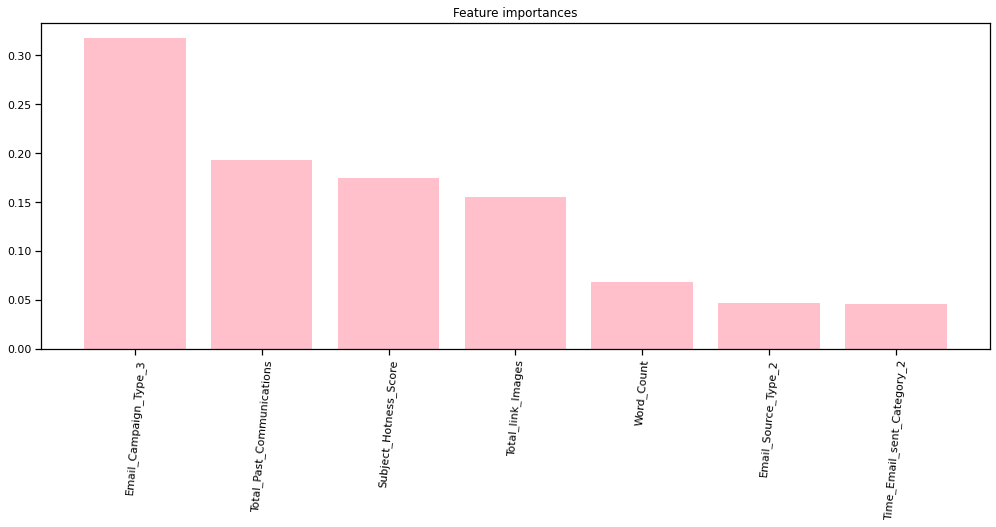

In [ ]:
# Feature Importance
feature_importances_xg=pd.DataFrame(xg_models.feature_importances_, index = X_train.columns, columns=['importance_xg']).sort_values('importance_xg', ascending=False)[:10]
plt.subplots(figsize=(17,6))
plt.title('Feature importances')
plt.bar(feature_importances_xg.index, feature_importances_xg['importance_xg'], color='pink',  align='center')
plt.xticks(feature_importances_xg.index, rotation = 85)

plt.show()

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Get shap values
explainer=shap.TreeExplainer(xg_models)
shap_values=explainer(X_test)

In [ ]:
# Shap interaction
shap_interaction_values=explainer.shap_interaction_values(X_test)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. *Campaign Type Performance:*

*  *Campaign 1: High view rate with fewer emails sent.*
*  *Campaign 2: Majority of emails ignored.*
*  *Campaign 3: High read rate despite fewer emails sent.*

2. *Email Timing:*

*  *Timing is irrelevant in email classification models.*
*  *Mid-day emails from category 2 are read more often than others.*

3. *Volume and Engagement:*

*  *More emails lead to higher read and acknowledgment rates.*
*  *Building customer relationships is key.*

4. *Content Length:*

*  *Emails over 600 words are likely ignored.*
*  *Ideal word count: 400-600 words.*
*  *Emails with more images are often disregarded.*

5. *Outliers in Data:*

*  *Most continuous variables had outliers, affecting over 5% of the minority data.*
*  *Outliers were left in to avoid skewing results.*

6. *SMOTE Analysis:*

*  *SMOTE improved performance but may cause information loss.*

7. *Best Model:*

*  *XGBoost Classifier: Best performance with 74% train score and 75% test score for F1.*

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

**Created by:** Vishal Sinha Roy

**Email:** vishalsingha.r05@gmail.com